<a href="https://colab.research.google.com/github/StarMindz/User-Re-engagement/blob/main/User%20Re-engagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount google drive to access the folder containing the datasets

try: # are we in Google Colab?
    from google.colab import drive
    drive.mount('/content/drive')
    dir = '/content/drive/My Drive/coureswork' #working directory
except:
    passD

import os
try:
    os.makedirs(dir)
    print("Directory sucessfully made!")
except FileExistsError:
    print("Directory already exist!")
    pass

Mounted at /content/drive
Directory already exist!


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from datetime import date

In [ ]:

# Specify the file paths of the dataset
data_file_path = '/content/drive/MyDrive/coureswork/Citizen_Science.xlsx'

In [ ]:
df1 = pd.read_excel(data_file_path, names=['Citizen ID', 'Datetime'])

In [ ]:
df1.head()

,Citizen ID,Datetime
0,54999c91bb7b56040d0011e8,23/12/14 16:53
1,54999c8fbb7b565d7e000a7c,23/12/14 16:53
2,54999cb29cd1184d77000539,23/12/14 16:53
3,54068fab91ad6b597e000f97,23/12/14 16:53
4,54068fab91ad6b597e000f97,23/12/14 16:53


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99998 entries, 0 to 99997
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Citizen ID  99998 non-null  object
 1   Datetime    99998 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [ ]:
df1.describe()

,Citizen ID,Datetime
count,99998,99998
unique,943,13371
top,5050a6760454e27aae0026db,29/12/14 21:38
freq,5531,69


In [ ]:
len(df1['Citizen ID'].unique())

943

In [ ]:
df1['Datetime']=pd.to_datetime(df1['Datetime'])

First generate basic Temporal features from the datetime HIT timestamps

In [ ]:
df1['year']= df1['Datetime'].dt.year
df1['month']= df1['Datetime'].dt.month
df1['day']= df1['Datetime'].dt.day
df1['Hour']= df1['Datetime'].dt.hour
df1['Minute']= df1['Datetime'].dt.minute
df1['Second']= df1['Datetime'].dt.second
df1['days of the week']= df1['Datetime'].dt.day_name()

df1['Time']= df1['Datetime'].dt.time
df1['Date']= df1['Datetime'].dt.date


df1

,Citizen ID,Datetime,year,month,day,Hour,Minute,Second,days of the week,Time,Date
0,54999c91bb7b56040d0011e8,2014-12-23 16:53:00,2014,12,23,16,53,0,Tuesday,16:53:00,2014-12-23
1,54999c8fbb7b565d7e000a7c,2014-12-23 16:53:00,2014,12,23,16,53,0,Tuesday,16:53:00,2014-12-23
2,54999cb29cd1184d77000539,2014-12-23 16:53:00,2014,12,23,16,53,0,Tuesday,16:53:00,2014-12-23
3,54068fab91ad6b597e000f97,2014-12-23 16:53:00,2014,12,23,16,53,0,Tuesday,16:53:00,2014-12-23
4,54068fab91ad6b597e000f97,2014-12-23 16:53:00,2014,12,23,16,53,0,Tuesday,16:53:00,2014-12-23
...,...,...,...,...,...,...,...,...,...,...,...
99993,54a47e7a9cd1185134000c11,2015-01-05 17:33:00,2015,1,5,17,33,0,Monday,17:33:00,2015-01-05
99994,54a47e7a9cd1185134000c11,2015-01-05 17:33:00,2015,1,5,17,33,0,Monday,17:33:00,2015-01-05
99995,548a2a7627b562650b001344,2015-01-05 17:33:00,2015,1,5,17,33,0,Monday,17:33:00,2015-01-05
99996,548a2a7627b562650b001344,2015-01-05 17:33:00,2015,1,5,17,33,0,Monday,17:33:00,2015-01-05


In [ ]:
data= df1.sort_values(by=['Citizen ID','Datetime'])
data.head(10)

,Citizen ID,Datetime,year,month,day,Hour,Minute,Second,days of the week,Time,Date
95969,4d5835cc2a82e278e6000028,2015-05-01 09:07:00,2015,5,1,9,7,0,Friday,09:07:00,2015-05-01
95970,4d5835cc2a82e278e6000028,2015-05-01 09:07:00,2015,5,1,9,7,0,Friday,09:07:00,2015-05-01
95971,4d5835cc2a82e278e6000028,2015-05-01 09:08:00,2015,5,1,9,8,0,Friday,09:08:00,2015-05-01
96057,4d5835cc2a82e278e6000028,2015-05-01 09:33:00,2015,5,1,9,33,0,Friday,09:33:00,2015-05-01
98711,4d5835cc2a82e278e6000028,2015-05-01 15:04:00,2015,5,1,15,4,0,Friday,15:04:00,2015-05-01
98727,4d5835cc2a82e278e6000028,2015-05-01 15:04:00,2015,5,1,15,4,0,Friday,15:04:00,2015-05-01
98734,4d5835cc2a82e278e6000028,2015-05-01 15:05:00,2015,5,1,15,5,0,Friday,15:05:00,2015-05-01
98744,4d5835cc2a82e278e6000028,2015-05-01 15:06:00,2015,5,1,15,6,0,Friday,15:06:00,2015-05-01
98746,4d5835cc2a82e278e6000028,2015-05-01 15:06:00,2015,5,1,15,6,0,Friday,15:06:00,2015-05-01
98761,4d5835cc2a82e278e6000028,2015-05-01 15:07:00,2015,5,1,15,7,0,Friday,15:07:00,2015-05-01


Next, generate session based features for each user and store in the session variable

In [ ]:
#drop duplicates
data = data.drop_duplicates()
data.head()

,Citizen ID,Datetime,year,month,day,Hour,Minute,Second,days of the week,Time,Date
95969,4d5835cc2a82e278e6000028,2015-05-01 09:07:00,2015,5,1,9,7,0,Friday,09:07:00,2015-05-01
95971,4d5835cc2a82e278e6000028,2015-05-01 09:08:00,2015,5,1,9,8,0,Friday,09:08:00,2015-05-01
96057,4d5835cc2a82e278e6000028,2015-05-01 09:33:00,2015,5,1,9,33,0,Friday,09:33:00,2015-05-01
98711,4d5835cc2a82e278e6000028,2015-05-01 15:04:00,2015,5,1,15,4,0,Friday,15:04:00,2015-05-01
98734,4d5835cc2a82e278e6000028,2015-05-01 15:05:00,2015,5,1,15,5,0,Friday,15:05:00,2015-05-01


In [ ]:
data['Citizen ID'].nunique()

943

In [ ]:
first_user_data = data.loc[data['Citizen ID'] == '4d5835cc2a82e278e6000028']
first_user_data
first_user_data.shape

(32, 11)

In [ ]:
first_user_data.head()

,Citizen ID,Datetime,year,month,day,Hour,Minute,Second,days of the week,Time,Date
95969,4d5835cc2a82e278e6000028,2015-05-01 09:07:00,2015,5,1,9,7,0,Friday,09:07:00,2015-05-01
95971,4d5835cc2a82e278e6000028,2015-05-01 09:08:00,2015,5,1,9,8,0,Friday,09:08:00,2015-05-01
96057,4d5835cc2a82e278e6000028,2015-05-01 09:33:00,2015,5,1,9,33,0,Friday,09:33:00,2015-05-01
98711,4d5835cc2a82e278e6000028,2015-05-01 15:04:00,2015,5,1,15,4,0,Friday,15:04:00,2015-05-01
98734,4d5835cc2a82e278e6000028,2015-05-01 15:05:00,2015,5,1,15,5,0,Friday,15:05:00,2015-05-01


In [ ]:
# Create a copy of the DataFrame in preparation for creation of session based features
first_user_data_copy = first_user_data.copy()

In [ ]:
# Create the session_id for the first user stored in first_user_data


# Initialize session ID counter
session_counter = 1

# Create a new column for session ID and initialize with zeros
first_user_data_copy['session_id'] = 0

# Initialize previous row information
previous_index = None

# Iterate over the rows of the dataframe for the first user
for index, row in first_user_data_copy.iterrows():
    # Check if the current row belongs to the same session as the previous row
    if previous_index is not None and (row['Datetime'] - first_user_data_copy.loc[previous_index, 'Datetime']).total_seconds() <= 1800:
        # Assign the same session ID as the previous row
        first_user_data_copy.loc[index, 'session_id'] = first_user_data_copy.loc[previous_index, 'session_id']
    else:
        # Assign a new session ID
        first_user_data_copy.loc[index, 'session_id'] = session_counter
        session_counter += 1

    # Update previous row information
    previous_index = index

# Print the updated dataframe for the first user
first_user_data_copy.head()

,Citizen ID,Datetime,year,month,day,Hour,Minute,Second,days of the week,Time,Date,session_id
95969,4d5835cc2a82e278e6000028,2015-05-01 09:07:00,2015,5,1,9,7,0,Friday,09:07:00,2015-05-01,1
95971,4d5835cc2a82e278e6000028,2015-05-01 09:08:00,2015,5,1,9,8,0,Friday,09:08:00,2015-05-01,1
96057,4d5835cc2a82e278e6000028,2015-05-01 09:33:00,2015,5,1,9,33,0,Friday,09:33:00,2015-05-01,1
98711,4d5835cc2a82e278e6000028,2015-05-01 15:04:00,2015,5,1,15,4,0,Friday,15:04:00,2015-05-01,2
98734,4d5835cc2a82e278e6000028,2015-05-01 15:05:00,2015,5,1,15,5,0,Friday,15:05:00,2015-05-01,2


In [ ]:
#Now create the session duration and number of hits features
# Calculate session duration for each session
session_duration = first_user_data_copy.groupby('session_id')['Datetime'].apply(lambda x: (x.max() - x.min()).total_seconds())

# Calculate number of hits per session
num_hits_per_session = first_user_data_copy.groupby('session_id').size()

# Assign the calculated session duration and number of hits per session to the original dataframe
first_user_data_copy['session_duration'] = first_user_data_copy['session_id'].map(session_duration)
first_user_data_copy['num_hits_per_session'] = first_user_data_copy['session_id'].map(num_hits_per_session)

# Print the updated dataframe for the first user
first_user_data_copy.head(10)

,Citizen ID,Datetime,year,month,day,Hour,Minute,Second,days of the week,Time,Date,session_id,session_duration,num_hits_per_session
95969,4d5835cc2a82e278e6000028,2015-05-01 09:07:00,2015,5,1,9,7,0,Friday,09:07:00,2015-05-01,1,1560.0,3
95971,4d5835cc2a82e278e6000028,2015-05-01 09:08:00,2015,5,1,9,8,0,Friday,09:08:00,2015-05-01,1,1560.0,3
96057,4d5835cc2a82e278e6000028,2015-05-01 09:33:00,2015,5,1,9,33,0,Friday,09:33:00,2015-05-01,1,1560.0,3
98711,4d5835cc2a82e278e6000028,2015-05-01 15:04:00,2015,5,1,15,4,0,Friday,15:04:00,2015-05-01,2,2880.0,29
98734,4d5835cc2a82e278e6000028,2015-05-01 15:05:00,2015,5,1,15,5,0,Friday,15:05:00,2015-05-01,2,2880.0,29
98744,4d5835cc2a82e278e6000028,2015-05-01 15:06:00,2015,5,1,15,6,0,Friday,15:06:00,2015-05-01,2,2880.0,29
98761,4d5835cc2a82e278e6000028,2015-05-01 15:07:00,2015,5,1,15,7,0,Friday,15:07:00,2015-05-01,2,2880.0,29
98771,4d5835cc2a82e278e6000028,2015-05-01 15:08:00,2015,5,1,15,8,0,Friday,15:08:00,2015-05-01,2,2880.0,29
98797,4d5835cc2a82e278e6000028,2015-05-01 15:09:00,2015,5,1,15,9,0,Friday,15:09:00,2015-05-01,2,2880.0,29
98860,4d5835cc2a82e278e6000028,2015-05-01 15:16:00,2015,5,1,15,16,0,Friday,15:16:00,2015-05-01,2,2880.0,29


In [ ]:
#Create the time between hit feature for the first user as well

# Calculate the time difference between hits for each session
first_user_data_copy['time_between_hits'] = first_user_data_copy.groupby('session_id')['Datetime'].diff().dt.total_seconds()

# Fill NaN values with 0
first_user_data_copy['time_between_hits'] = first_user_data_copy['time_between_hits'].fillna(0)

# Print the updated dataframe for the first user
first_user_data_copy.head()

,Citizen ID,Datetime,year,month,day,Hour,Minute,Second,days of the week,Time,Date,session_id,session_duration,num_hits_per_session,time_between_hits
95969,4d5835cc2a82e278e6000028,2015-05-01 09:07:00,2015,5,1,9,7,0,Friday,09:07:00,2015-05-01,1,1560.0,3,0.0
95971,4d5835cc2a82e278e6000028,2015-05-01 09:08:00,2015,5,1,9,8,0,Friday,09:08:00,2015-05-01,1,1560.0,3,60.0
96057,4d5835cc2a82e278e6000028,2015-05-01 09:33:00,2015,5,1,9,33,0,Friday,09:33:00,2015-05-01,1,1560.0,3,1500.0
98711,4d5835cc2a82e278e6000028,2015-05-01 15:04:00,2015,5,1,15,4,0,Friday,15:04:00,2015-05-01,2,2880.0,29,0.0
98734,4d5835cc2a82e278e6000028,2015-05-01 15:05:00,2015,5,1,15,5,0,Friday,15:05:00,2015-05-01,2,2880.0,29,60.0


In [ ]:


# Calculate the engagement label for each session and store it in a new column 'engagement_label'
first_user_data_copy['engagement_label'] = (first_user_data_copy.groupby(['Citizen ID', 'session_id'])['time_between_hits'].transform('max') >= 300)

# Convert the boolean values to 1 for True and 0 for False
first_user_data_copy['engagement_label'] = first_user_data_copy['engagement_label'].astype(int)

# Print the updated dataframe with the engagement label
first_user_data_copy.head()

,Citizen ID,Datetime,year,month,day,Hour,Minute,Second,days of the week,Time,Date,session_id,session_duration,num_hits_per_session,time_between_hits,engagement_label
95969,4d5835cc2a82e278e6000028,2015-05-01 09:07:00,2015,5,1,9,7,0,Friday,09:07:00,2015-05-01,1,1560.0,3,0.0,1
95971,4d5835cc2a82e278e6000028,2015-05-01 09:08:00,2015,5,1,9,8,0,Friday,09:08:00,2015-05-01,1,1560.0,3,60.0,1
96057,4d5835cc2a82e278e6000028,2015-05-01 09:33:00,2015,5,1,9,33,0,Friday,09:33:00,2015-05-01,1,1560.0,3,1500.0,1
98711,4d5835cc2a82e278e6000028,2015-05-01 15:04:00,2015,5,1,15,4,0,Friday,15:04:00,2015-05-01,2,2880.0,29,0.0,1
98734,4d5835cc2a82e278e6000028,2015-05-01 15:05:00,2015,5,1,15,5,0,Friday,15:05:00,2015-05-01,2,2880.0,29,60.0,1


In [ ]:

#Overwrite first_user_data
first_user_data = first_user_data_copy.copy()

In [ ]:
first_user_data.head()

,Citizen ID,Datetime,year,month,day,Hour,Minute,Second,days of the week,Time,Date,session_id,session_duration,num_hits_per_session,time_between_hits,engagement_label
95969,4d5835cc2a82e278e6000028,2015-05-01 09:07:00,2015,5,1,9,7,0,Friday,09:07:00,2015-05-01,1,1560.0,3,0.0,1
95971,4d5835cc2a82e278e6000028,2015-05-01 09:08:00,2015,5,1,9,8,0,Friday,09:08:00,2015-05-01,1,1560.0,3,60.0,1
96057,4d5835cc2a82e278e6000028,2015-05-01 09:33:00,2015,5,1,9,33,0,Friday,09:33:00,2015-05-01,1,1560.0,3,1500.0,1
98711,4d5835cc2a82e278e6000028,2015-05-01 15:04:00,2015,5,1,15,4,0,Friday,15:04:00,2015-05-01,2,2880.0,29,0.0,1
98734,4d5835cc2a82e278e6000028,2015-05-01 15:05:00,2015,5,1,15,5,0,Friday,15:05:00,2015-05-01,2,2880.0,29,60.0,1


In [ ]:
#Create a function to generate all the user based on a go once fed a dataset and the use id to focus on
def generate_user_profile(data, user_id):
    # Filter the data for the specific user ID
    user_data = data[data['Citizen ID'] == user_id]

    # Group the data by session ID
    grouped_data = user_data.groupby(['Citizen ID', 'session_id'])

    # Calculate session based aggregates
    session_aggregates = grouped_data.agg({
        'num_hits_per_session': 'last',
        'session_duration': 'last',
        'engagement_label': 'last',
        'time_between_hits': 'mean',
        'year': ['first', 'last'],
        'month': ['first', 'last'],
        'day': ['first', 'last', lambda x: x.mode().iloc[0]],
        'Hour': ['first', 'last', lambda x: x.mode().iloc[0]],
        'days of the week': lambda x: x.mode().iloc[0],
    }).reset_index()

    # Rename the columns
    session_aggregates.columns = ['Citizen ID', 'session_id', 'num_hits_per_session', 'session_duration', 'engagement_label',
                                  'time_between_hits', 'start_year', 'end_year', 'start_month', 'end_month', 'start_day', 'end_day', 'most_active_day', 'start_hour', 'end_hour', 'most_active_hour', 'most_active_day_of_the_week']

    # Group the session-level aggregates by 'Citizen ID' to calculate user-level aggregates
    user_profile = session_aggregates.groupby('Citizen ID').agg(
        num_sessions=('session_id', 'nunique'),  # Number of sessions per user
        total_hits=('num_hits_per_session', 'sum'),  # Total number of hits
        total_time_spent=('session_duration', 'sum'),  # Total time spent on hits
        avg_hits_per_session=('num_hits_per_session', 'mean'),  # Average number of hits per session
        avg_session_duration=('session_duration', 'mean'),  # Average session duration
        avg_time_between_hits=('time_between_hits', 'mean'),  # Average time between hits
        longest_session_duration=('session_duration', 'max'),  # Longest session duration
        start_year=('start_year', 'first'),
        start_day=('start_day', 'first'),
        start_month=('start_month', 'first'),
        end_year=('end_year', 'last'),
        end_day=('end_day', 'last'),
        end_month=('end_month', 'last'),
        start_hour=('start_hour', 'first'),
        end_hour=('end_hour', 'last'),
        most_active_day=('most_active_day', lambda x: x.mode().iloc[0]),
        most_active_hour=('most_active_hour', lambda x: x.mode().iloc[0]),
        most_active_day_of_the_week=('most_active_day_of_the_week', lambda x: x.mode().iloc[0]),
        engaged_user=('engagement_label', lambda x: 1 if x.sum() / len(x) >= 0.5 else 0),
    ).reset_index()

    return user_profile

# Example usage:
first_user_profile = generate_user_profile(first_user_data, '4d5835cc2a82e278e6000028')
first_user_profile.head()

,Citizen ID,num_sessions,total_hits,total_time_spent,avg_hits_per_session,avg_session_duration,avg_time_between_hits,longest_session_duration,start_year,start_day,start_month,end_year,end_day,end_month,start_hour,end_hour,most_active_day,most_active_hour,most_active_day_of_the_week,engaged_user
0,4d5835cc2a82e278e6000028,2,32,4440.0,16.0,2220.0,309.655172,2880.0,2015,1,5,2015,1,5,9,15,1,9,Friday,1


## Explanation of the function above

The function takes a dataset (data) and a user ID (user_id) as input. It filters the dataset to retrieve only the rows corresponding to the specified user ID. The filtered data is then grouped by the user ID and session ID. The previously generated session-level features are then used to generate the user profile. Here the last values of 'num_hits_per_session', 'session_duration', 'engagement_label', and the average value of 'time_between_hits' within a session is used. The session-level aggregates are further grouped by the user ID to calculate user-level aggregates. The function returns the user profile, which contains these aggregated features

First create the session id column

### Here is a breakdown of the user-level aggregates calculated:

num_sessions: The number of unique sessions per user is calculated by counting the unique values of 'session_id' within each user group.

total_hits: The total number of hits per user is obtained by summing up the values of 'num_hits_per_session' within each user group.

total_time_spent_on_hit: The total time spent on hits per user is calculated by summing up the values of 'session_duration' within each user group.

avg_hits_per_session: The average number of hits per session for each user is obtained by calculating the mean of 'num_hits_per_session' within each user group.

avg_session_duration: The average session duration for each user is calculated by taking the mean of 'session_duration' within each user group.

avg_time_between_hits_within_session: The average time between consecutive hits within a session for each user is calculated by taking the mean of 'time_between_hits' within each user group.

ratio_time_spent_to_session_duration: The ratio of time spent on hits to the total session duration for each user is obtained by dividing the sum of 'session_duration' by the count of 'session_duration' within each user group.

avg_time_between_hits: The average time between hits for each user is calculated by taking the mean of 'time_between_hits' within each user group.

longest_session_duration: The longest session duration for each user is obtained by taking the maximum value of 'session_duration' within each user group.

engaged_user: These is 1 (true) when 50% or more of the sessions for that user had an engagement label of 1 (true) else it is 0 (false)
start_year: The year when the first session for each user started.

start_day: The day when the first session for each user started.

start_month: The month when the first session for each user started.

end_year: The year when the last session for each user ended.

end_day: The day when the last session for each user ended.

end_month: The month when the last session for each user ended.

most_active_day_of_the_week: The day of the week (e.g., Monday, Tuesday, etc.) when the user is most active based on the mode of 'days of the week' within each user group.

most_active_day: The day of the month when the user is most active based on the mode of 'day' within each user group.

most_active_hour: The hour of the day when the user is most active based on the mode of 'Hour' within each user group.

These user-level aggregates provide summarized information about each user based on their session-level data.

### Here's a proper explanation of the logic behind the label "engaged_user"

To create the labels, we examine each user's sessions. Within each session, we check if there is a 5-minute break. If there is a break within a session (which requires multiple hits and at least one occurrence of a 5-minute or more time difference between hits), we assign a session label of true/positive (1) to indicate that the user took a 5-minute break but came back within the same session. If there is no break within the session, we assign a session label of false/negative (0).

Next, to determine the user profile label, we consider the majority class of session labels for each user. If 50% or more of the user's sessions have a positive label (indicating a 5-minute break followed by a return), the user profile label is set to true/positive (1). On the other hand, if the number of sessions with a negative label (no 5-minute break) is greater than 50% of the user's total sessions, the user profile label is set to false/negative (0).

In summary, the user profile label represents whether the user tends to take 5-minute breaks and return within the same session (positive) or not (negative), based on the majority behavior observed across their sessions.

### Now do all the above feature engineering steps for the entire dataset

In [ ]:
#Create a single function for generating all the session based features on a go once fed a dataset
def create_session_features(data):
    #Create copy of data before adding session based features
    data_copy = data.copy()

    # Initialize session ID counter
    session_counter = 1

    # Create a new column for session ID and initialize with zeros
    data_copy['session_id'] = 0

    # Initialize previous row information
    previous_index = None

    # Iterate over the rows of the dataframe
    for index, row in data_copy.iterrows():
        # Check if the current row belongs to the same session as the previous row
        # Check if there is a previous row and the 'Citizen ID' of the current row is the same as the previous row
        # Also, check if the time difference between the current row and the previous row is less than or equal to 1800 seconds (30 minutes)
        if previous_index is not None and row['Citizen ID'] == data_copy.loc[previous_index, 'Citizen ID'] and (row['Datetime'] - data_copy.loc[previous_index, 'Datetime']).total_seconds() <= 1800:
            # Assign the same session ID as the previous row
            data_copy.loc[index, 'session_id'] = data_copy.loc[previous_index, 'session_id']
        else:
            # Assign a new session ID
            data_copy.loc[index, 'session_id'] = session_counter
            session_counter += 1

        # Update previous row information
        previous_index = index

    # Calculate session duration
    session_duration = data_copy.groupby('session_id')['Datetime'].apply(lambda x: (x.max() - x.min()).total_seconds())

    # Calculate number of hits per session
    num_hits = data_copy.groupby('session_id').size()

    # Add the calculated columns to the original dataframe
    data_copy['session_duration'] = data_copy['session_id'].map(session_duration)
    data_copy['num_hits_per_session'] = data_copy['session_id'].map(num_hits)

    # Calculate the time difference between consecutive hits within each session
    # Calculate the time difference between hits for each user
    data_copy['time_between_hits'] = data_copy.groupby('Citizen ID')['Datetime'].diff().dt.total_seconds()

    # Fill NaN values with 0
    data_copy['time_between_hits'] = data_copy['time_between_hits'].fillna(0)

    # Calculate the engagement label for each session
    data_copy['engagement_label'] = (data_copy.groupby(['Citizen ID', 'session_id'])['time_between_hits'].transform('max') >= 300)

    # Convert the boolean values to 1 for True and 0 for False
    data_copy['engagement_label'] = data_copy['engagement_label'].astype(int)

    #overwrite the original dataframe
    data = data_copy.copy()

    return data

# Example usage with the first_user_data DataFrame
first_user_data2 = create_session_features(first_user_data)

In [ ]:
first_user_data2.head()

,Citizen ID,Datetime,year,month,day,Hour,Minute,Second,days of the week,Time,Date,session_id,session_duration,num_hits_per_session,time_between_hits,engagement_label
95969,4d5835cc2a82e278e6000028,2015-05-01 09:07:00,2015,5,1,9,7,0,Friday,09:07:00,2015-05-01,1,1560.0,3,0.0,1
95971,4d5835cc2a82e278e6000028,2015-05-01 09:08:00,2015,5,1,9,8,0,Friday,09:08:00,2015-05-01,1,1560.0,3,60.0,1
96057,4d5835cc2a82e278e6000028,2015-05-01 09:33:00,2015,5,1,9,33,0,Friday,09:33:00,2015-05-01,1,1560.0,3,1500.0,1
98711,4d5835cc2a82e278e6000028,2015-05-01 15:04:00,2015,5,1,15,4,0,Friday,15:04:00,2015-05-01,2,2880.0,29,19860.0,1
98734,4d5835cc2a82e278e6000028,2015-05-01 15:05:00,2015,5,1,15,5,0,Friday,15:05:00,2015-05-01,2,2880.0,29,60.0,1


In [ ]:
#Now generate the session based features for the entire dataset
data = create_session_features(data)
data.head()

,Citizen ID,Datetime,year,month,day,Hour,Minute,Second,days of the week,Time,Date,session_id,session_duration,num_hits_per_session,time_between_hits,engagement_label
95969,4d5835cc2a82e278e6000028,2015-05-01 09:07:00,2015,5,1,9,7,0,Friday,09:07:00,2015-05-01,1,1560.0,3,0.0,1
95971,4d5835cc2a82e278e6000028,2015-05-01 09:08:00,2015,5,1,9,8,0,Friday,09:08:00,2015-05-01,1,1560.0,3,60.0,1
96057,4d5835cc2a82e278e6000028,2015-05-01 09:33:00,2015,5,1,9,33,0,Friday,09:33:00,2015-05-01,1,1560.0,3,1500.0,1
98711,4d5835cc2a82e278e6000028,2015-05-01 15:04:00,2015,5,1,15,4,0,Friday,15:04:00,2015-05-01,2,2880.0,29,19860.0,1
98734,4d5835cc2a82e278e6000028,2015-05-01 15:05:00,2015,5,1,15,5,0,Friday,15:05:00,2015-05-01,2,2880.0,29,60.0,1


Next we will iterate through all the users to generate the complete user profile

In [ ]:
# Create an empty DataFrame to store all user profiles
user_profile = pd.DataFrame()

# Iterate through all the users and create the complete user profile for each user
for user_id in data['Citizen ID'].unique():
    profile = generate_user_profile(data, user_id)
    user_profile = pd.concat([user_profile, profile], ignore_index=True)

# Print the DataFrame containing all user profiles
user_profile.head()

,Citizen ID,num_sessions,total_hits,total_time_spent,avg_hits_per_session,avg_session_duration,avg_time_between_hits,longest_session_duration,start_year,start_day,start_month,end_year,end_day,end_month,start_hour,end_hour,most_active_day,most_active_hour,most_active_day_of_the_week,engaged_user
0,4d5835cc2a82e278e6000028,2,32,4440.0,16.0,2220.0,652.068966,2880.0,2015,1,5,2015,1,5,9,15,1,9,Friday,1
1,4fcaa6daae60e44a1900000b,1,3,120.0,3.0,120.0,40.000000,120.0,2015,1,1,2015,1,1,3,3,1,3,Thursday,0
2,50085cfc44dff81137000020,2,2,0.0,1.0,0.0,169890.000000,0.0,2014,28,12,2015,1,1,22,20,1,20,Sunday,1
3,5013adf30454e27ae4000002,1,1,0.0,1.0,0.0,0.000000,0.0,2015,1,2,2015,1,2,22,22,1,22,Sunday,0
4,503e2b5eba40af242e000052,3,12,540.0,4.0,180.0,42876.000000,540.0,2014,26,12,2014,29,12,13,17,26,13,Friday,1


### Next filter the dataset and select only users with one session

In [ ]:
one_session_profiles = user_profile[user_profile['num_sessions'] == 1]
one_session_profiles.head()

,Citizen ID,num_sessions,total_hits,total_time_spent,avg_hits_per_session,avg_session_duration,avg_time_between_hits,longest_session_duration,start_year,start_day,start_month,end_year,end_day,end_month,start_hour,end_hour,most_active_day,most_active_hour,most_active_day_of_the_week,engaged_user
1,4fcaa6daae60e44a1900000b,1,3,120.0,3.0,120.0,40.000000,120.0,2015,1,1,2015,1,1,3,3,1,3,Thursday,0
3,5013adf30454e27ae4000002,1,1,0.0,1.0,0.0,0.000000,0.0,2015,1,2,2015,1,2,22,22,1,22,Sunday,0
8,503e4ee6ba40af242000019d,1,11,600.0,11.0,600.0,54.545455,600.0,2014,29,12,2014,29,12,15,15,29,15,Monday,0
10,503e64b2ba40af2411000187,1,6,1320.0,6.0,1320.0,220.000000,1320.0,2015,1,1,2015,1,1,17,18,1,17,Thursday,1
11,503e8046ba40af24200003e6,1,3,120.0,3.0,120.0,40.000000,120.0,2015,1,3,2015,1,3,22,22,1,22,Sunday,0


In [ ]:
len(one_session_profiles)
#drop the num of session column since this is no longer a useful features
one_session_profiles = one_session_profiles.drop(columns=['num_sessions'])

In [ ]:
one_session_profiles.head()

,Citizen ID,total_hits,total_time_spent,avg_hits_per_session,avg_session_duration,avg_time_between_hits,longest_session_duration,start_year,start_day,start_month,end_year,end_day,end_month,start_hour,end_hour,most_active_day,most_active_hour,most_active_day_of_the_week,engaged_user
1,4fcaa6daae60e44a1900000b,3,120.0,3.0,120.0,40.000000,120.0,2015,1,1,2015,1,1,3,3,1,3,Thursday,0
3,5013adf30454e27ae4000002,1,0.0,1.0,0.0,0.000000,0.0,2015,1,2,2015,1,2,22,22,1,22,Sunday,0
8,503e4ee6ba40af242000019d,11,600.0,11.0,600.0,54.545455,600.0,2014,29,12,2014,29,12,15,15,29,15,Monday,0
10,503e64b2ba40af2411000187,6,1320.0,6.0,1320.0,220.000000,1320.0,2015,1,1,2015,1,1,17,18,1,17,Thursday,1
11,503e8046ba40af24200003e6,3,120.0,3.0,120.0,40.000000,120.0,2015,1,3,2015,1,3,22,22,1,22,Sunday,0


## Data Exploration

In [ ]:

# Get the value counts of the 'engaged_label' column to see if the dataset is balanced based on the two classes
label_counts = one_session_profiles['engaged_user'].value_counts()

# Print the label counts
print(label_counts)

0    497
1     86
Name: engaged_user, dtype: int64


In [ ]:
one_session_profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 1 to 942
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Citizen ID                   583 non-null    object 
 1   total_hits                   583 non-null    int64  
 2   total_time_spent             583 non-null    float64
 3   avg_hits_per_session         583 non-null    float64
 4   avg_session_duration         583 non-null    float64
 5   avg_time_between_hits        583 non-null    float64
 6   longest_session_duration     583 non-null    float64
 7   start_year                   583 non-null    int64  
 8   start_day                    583 non-null    int64  
 9   start_month                  583 non-null    int64  
 10  end_year                     583 non-null    int64  
 11  end_day                      583 non-null    int64  
 12  end_month                    583 non-null    int64  
 13  start_hour          

In [ ]:
one_session_profiles.describe()

,total_hits,total_time_spent,avg_hits_per_session,avg_session_duration,avg_time_between_hits,longest_session_duration,start_year,start_day,start_month,end_year,end_day,end_month,start_hour,end_hour,most_active_day,most_active_hour,engaged_user
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,9.624357,709.502573,9.624357,709.502573,59.164189,709.502573,2014.415094,16.214408,8.267581,2014.416810,16.173242,8.248714,12.723842,12.648370,16.219554,12.687822,0.147513
std,13.850995,1113.357014,13.850995,1113.357014,49.448980,1113.357014,0.493161,12.970638,4.519575,0.493454,12.980259,4.526921,6.926286,6.956778,12.974989,6.946183,0.354921
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000,2014.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.000000,120.000000,3.000000,120.000000,40.000000,120.000000,2014.000000,1.000000,3.000000,2014.000000,1.000000,3.000000,7.000000,6.500000,1.000000,7.000000,0.000000
50%,5.000000,360.000000,5.000000,360.000000,54.545455,360.000000,2014.000000,24.000000,12.000000,2014.000000,24.000000,12.000000,14.000000,14.000000,24.000000,14.000000,0.000000
75%,12.000000,840.000000,12.000000,840.000000,68.571429,840.000000,2015.000000,28.000000,12.000000,2015.000000,28.000000,12.000000,19.000000,18.000000,28.000000,19.000000,0.000000
max,185.000000,12900.000000,185.000000,12900.000000,460.000000,12900.000000,2015.000000,31.000000,12.000000,2015.000000,31.000000,12.000000,23.000000,23.000000,31.000000,23.000000,1.000000


<Axes: xlabel='engaged_user', ylabel='count'>

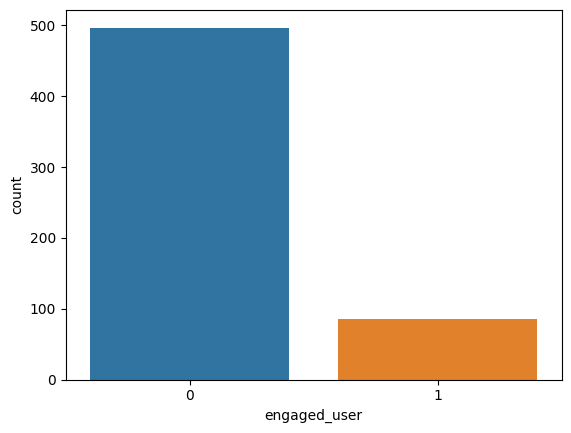

In [ ]:

#Show distribution of the class on whole dataset
sns.countplot(x= 'engaged_user', data=one_session_profiles)

Check for missing value and handle them appropriately should they exist

In [ ]:

# Check for missing values in the DataFrame
missing_values = one_session_profiles.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Citizen ID                     0
total_hits                     0
total_time_spent               0
avg_hits_per_session           0
avg_session_duration           0
avg_time_between_hits          0
longest_session_duration       0
start_year                     0
start_day                      0
start_month                    0
end_year                       0
end_day                        0
end_month                      0
start_hour                     0
end_hour                       0
most_active_day                0
most_active_hour               0
most_active_day_of_the_week    0
engaged_user                   0
dtype: int64


From the above, it can be seen that no missing value exist in the dataframe

Check for duplicate rows

In [ ]:
# Check for duplicate rows
duplicates = one_session_profiles.duplicated()
print("Duplicate Rows:")
print(one_session_profiles[duplicates])

Duplicate Rows:
Empty DataFrame
Columns: [Citizen ID, total_hits, total_time_spent, avg_hits_per_session, avg_session_duration, avg_time_between_hits, longest_session_duration, start_year, start_day, start_month, end_year, end_day, end_month, start_hour, end_hour, most_active_day, most_active_hour, most_active_day_of_the_week, engaged_user]
Index: []


Get the numerical and categorical features

In [ ]:
# Select numerical features
numerical_features = one_session_profiles.select_dtypes(include=[int, float]).columns.tolist()

# Select categorical features
categorical_features = one_session_profiles.select_dtypes(include=['object']).columns.tolist()

# Print the features
print(categorical_features)
print(numerical_features)

['Citizen ID', 'most_active_day_of_the_week']
['total_hits', 'total_time_spent', 'avg_hits_per_session', 'avg_session_duration', 'avg_time_between_hits', 'longest_session_duration', 'start_year', 'start_day', 'start_month', 'end_year', 'end_day', 'end_month', 'start_hour', 'end_hour', 'most_active_day', 'most_active_hour', 'engaged_user']


In [ ]:
# Separate the Citizen ID column to help map future prediction based on index
citizen_ids = one_session_profiles['Citizen ID']

In [ ]:
citizen_ids

1      4fcaa6daae60e44a1900000b
3      5013adf30454e27ae4000002
8      503e4ee6ba40af242000019d
10     503e64b2ba40af2411000187
11     503e8046ba40af24200003e6
                 ...           
938    54aaa28a9cd1187eeb0000cf
939    54aaa4f4bb7b565415000023
940    54aaa579bb7b563483000398
941    54aaaba29cd1180cf7000070
942    54aac9549cd11825500000f8
Name: Citizen ID, Length: 583, dtype: object

In [ ]:

#Seperate the features from the label

label = one_session_profiles.engaged_user
features = one_session_profiles.drop(['Citizen ID', 'engaged_user'], axis=1)

In [ ]:
label.head()

1     0
3     0
8     0
10    1
11    0
Name: engaged_user, dtype: int64

In [ ]:
features.head()

,total_hits,total_time_spent,avg_hits_per_session,avg_session_duration,avg_time_between_hits,longest_session_duration,start_year,start_day,start_month,end_year,end_day,end_month,start_hour,end_hour,most_active_day,most_active_hour,most_active_day_of_the_week
1,3,120.0,3.0,120.0,40.000000,120.0,2015,1,1,2015,1,1,3,3,1,3,Thursday
3,1,0.0,1.0,0.0,0.000000,0.0,2015,1,2,2015,1,2,22,22,1,22,Sunday
8,11,600.0,11.0,600.0,54.545455,600.0,2014,29,12,2014,29,12,15,15,29,15,Monday
10,6,1320.0,6.0,1320.0,220.000000,1320.0,2015,1,1,2015,1,1,17,18,1,17,Thursday
11,3,120.0,3.0,120.0,40.000000,120.0,2015,1,3,2015,1,3,22,22,1,22,Sunday


##Visualization

###Data distribution visualization

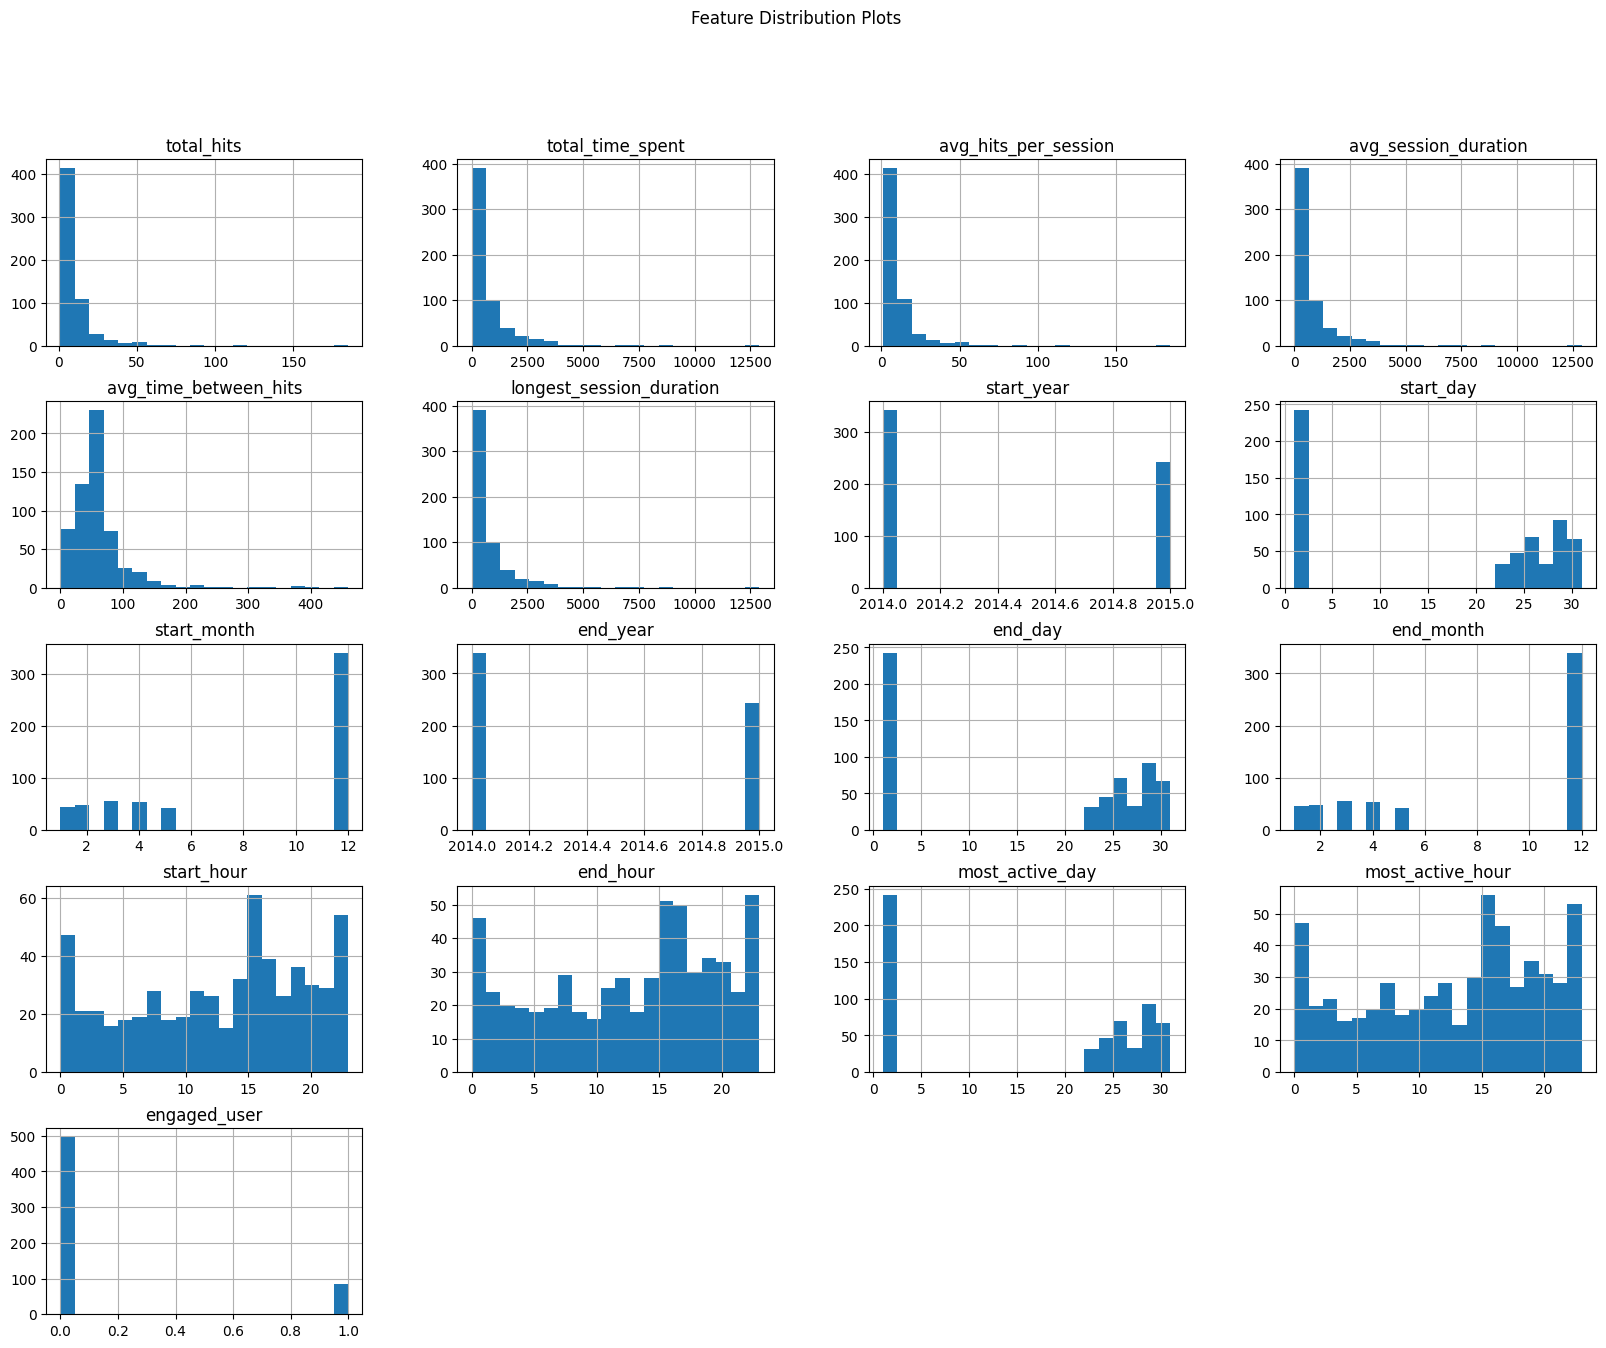

In [ ]:
import matplotlib.pyplot as plt
one_session_profiles.hist(bins=20, figsize=(20, 15))
plt.suptitle('Feature Distribution Plots')
plt.show()

These plots reveal the distribution each features, helping us identify features with skewed and balanced normal distributions. Most of the features are skewed

###Pairplots

A pair plot is a useful way to visualize how different features relate to a binary label in a classification task. It does this by making a grid of scatter plots, where each feature is compared with every other feature, and the points are colored based on the binary label

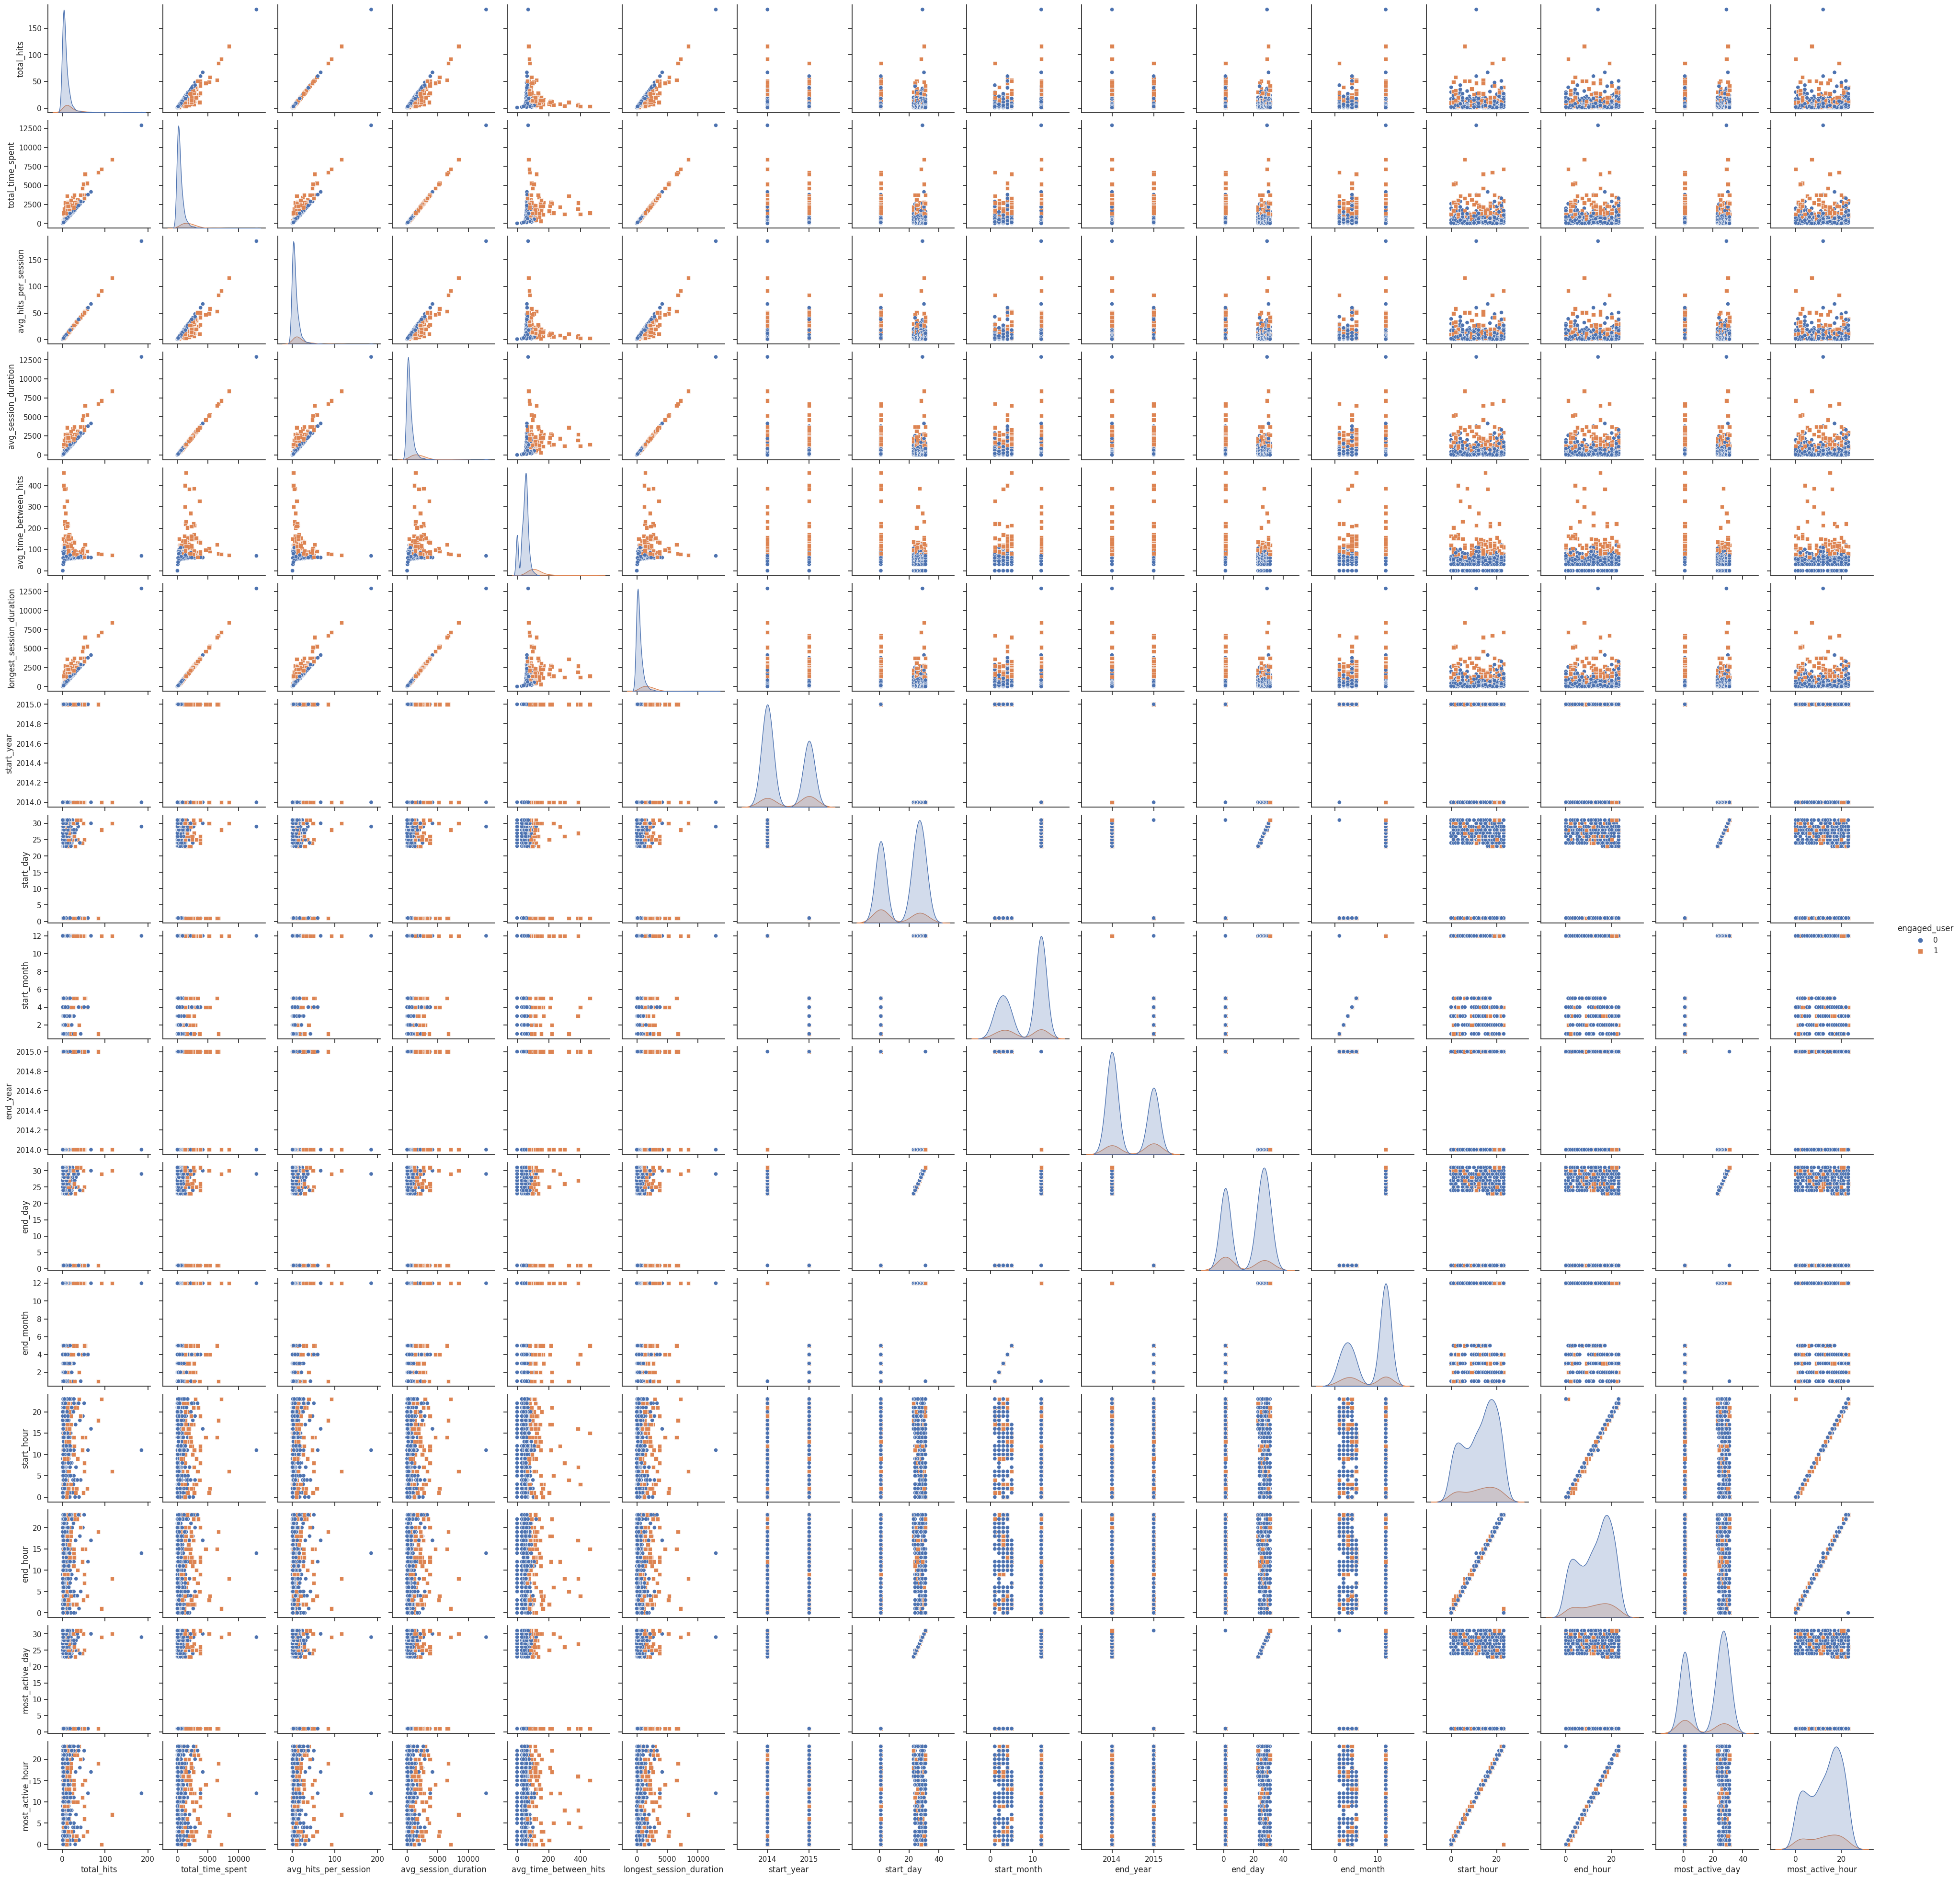

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")
sns.pairplot(one_session_profiles, hue="engaged_user", markers=["o", "s"])

plt.show()

One key observation from above is the clustering and separation of points. When points of the same class cluster together and are distinctly separated from the other class in certain scatter plots, it indicates that those features have the potential to discriminate well between the two classes. The ability to draw a clear boundary between the clusters suggests that the corresponding two features are be strong predictors of the label.

The pair plot allows us to identify relationships between features. For instance, if two features show a distinctive separation between classes in their scatter plot, it implies a strong relationship between those features and the label. On the other hand, scatter plots that show a lack of separation might indicate that those features are less influential in distinguishing between classes.

The density plots that are noticed along the diagonal are equally important. They provide insights into the distribution of each individual feature for both classes. This helps understand the range and spread of feature values, as well as the regions of overlap or distinction between the classes. By examining these density plots, we can identify the areas where the two classes might overlap.

###Check for Outliers

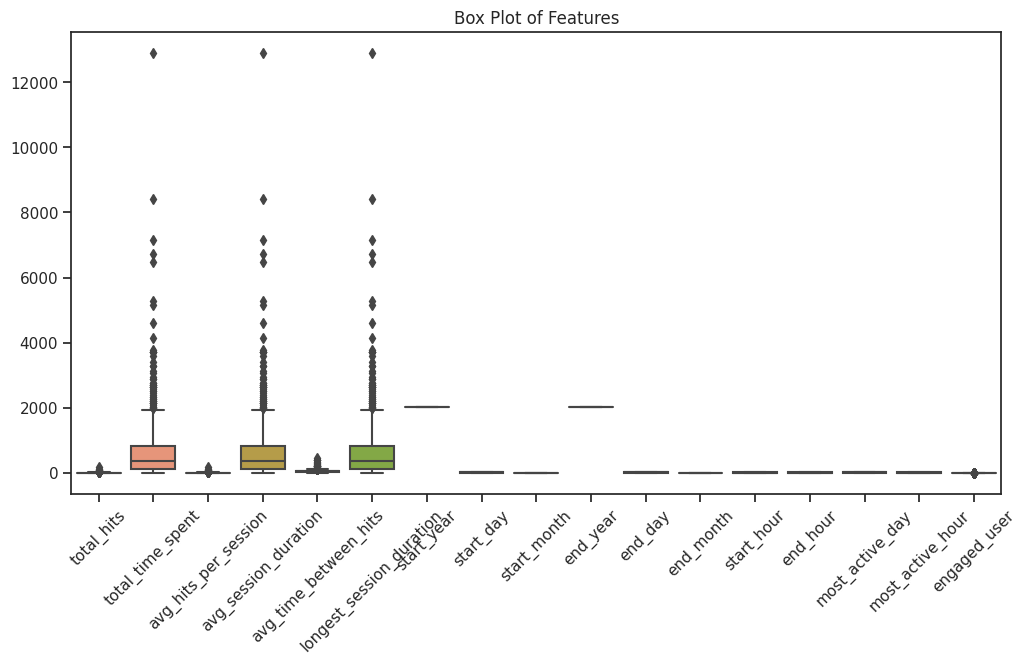

In [ ]:
# Check for outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=one_session_profiles)
plt.title("Box Plot of Features")
plt.xticks(rotation=45)
plt.show()

##Train test split
split the data into train and test

In [ ]:

#Carry out train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

##Label Encoding

Carryout label encoding for the categorical features 'most_active_day_of_the_week'

In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform 'most_active_day_of_the_week' using label encoding
X_train['most_active_day_of_the_week'] = label_encoder.fit_transform(X_train['most_active_day_of_the_week'])
X_test['most_active_day_of_the_week'] = label_encoder.transform(X_test['most_active_day_of_the_week'])


# Print the DataFrame with the new encoded column
X_train.head()

,total_hits,total_time_spent,avg_hits_per_session,avg_session_duration,avg_time_between_hits,longest_session_duration,start_year,start_day,start_month,end_year,end_day,end_month,start_hour,end_hour,most_active_day,most_active_hour,most_active_day_of_the_week
137,4,180.0,4.0,180.0,45.000000,180.0,2015,1,2,2015,1,2,19,19,1,19,3
941,5,240.0,5.0,240.0,48.000000,240.0,2015,1,5,2015,1,5,15,15,1,15,0
352,36,3120.0,36.0,3120.0,86.666667,3120.0,2014,25,12,2014,25,12,9,10,25,10,4
320,5,1920.0,5.0,1920.0,384.000000,1920.0,2015,1,3,2015,1,3,16,17,1,16,3
762,2,60.0,2.0,60.0,30.000000,60.0,2014,30,12,2014,30,12,19,19,30,19,5


##Normalization

We are using Standardization (Z-score scaling). The reason is that the user profile features, such as 'total_hits', 'total_time_spent_on_hit', 'avg_hits_per_session', 'avg_session_duration', etc., may have significantly different scales and units.

Using Standardization will scale all the features to have a mean of 0 and a standard deviation of 1. This ensures that the features are on a similar scale and can prevent any one feature from dominating the learning process. It also makes the algorithm less sensitive to the magnitude of the features.

Additionally, Standardization is less affected by outliers compared to Min-Max scaling, which can be beneficial when dealing with real-world data where outliers are common

In [ ]:
from sklearn.preprocessing import StandardScaler

# Get the numerical features (excluding 'most_active_day_of_the_week' which has already been label encoded)
numerical_features = X_train.select_dtypes(include=['number']).drop(columns=['most_active_day_of_the_week']).columns

# Apply standard scaling to numerical features
standard_scaler = StandardScaler()
X_train[numerical_features] = standard_scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = standard_scaler.transform(X_test[numerical_features])

# Now only the numerical features except 'most_active_day_of_the_week' are standardized.

In [ ]:
X_train.head()

,total_hits,total_time_spent,avg_hits_per_session,avg_session_duration,avg_time_between_hits,longest_session_duration,start_year,start_day,start_month,end_year,end_day,end_month,start_hour,end_hour,most_active_day,most_active_hour,most_active_day_of_the_week
137,-0.385193,-0.463565,-0.385193,-0.463565,-0.273845,-0.463565,1.205252,-1.191832,-1.391935,1.199913,-1.186630,-1.383872,0.889267,0.899037,-1.191791,0.890632,3
941,-0.315103,-0.410200,-0.315103,-0.410200,-0.217041,-0.410200,1.205252,-1.191832,-0.730056,1.199913,-1.186630,-0.723356,0.313914,0.326895,-1.191791,0.316190,0
352,1.857681,2.151316,1.857681,2.151316,0.515100,2.151316,-0.829702,0.669823,0.814329,-0.833394,0.673394,0.817850,-0.549117,-0.388283,0.669280,-0.401863,4
320,-0.315103,1.084018,-0.315103,1.084018,6.145009,1.084018,1.205252,-1.191832,-1.171309,1.199913,-1.186630,-1.163700,0.457752,0.612966,-1.191791,0.459800,3
762,-0.525373,-0.570295,-0.525373,-0.570295,-0.557865,-0.570295,-0.829702,1.057668,0.814329,-0.833394,1.060899,0.817850,0.889267,0.899037,1.057004,0.890632,5


## Resampling

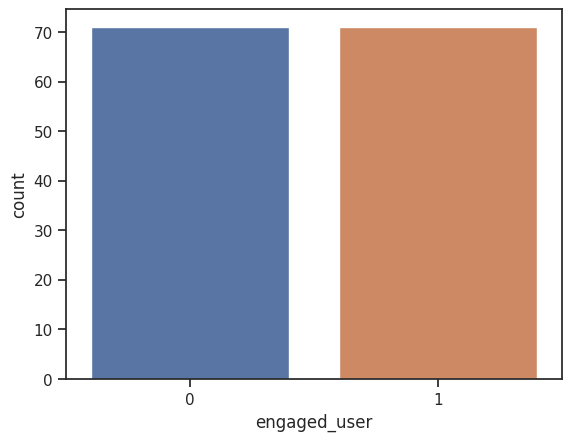

In [ ]:
from sklearn.utils import resample

# Combine X_train and y_train back into a single DataFrame
X_train_df = pd.DataFrame(X_train, columns=X_train.columns)
y_train_df = pd.DataFrame(y_train, columns=['engaged_user'])
df_train = pd.concat([X_train_df, y_train_df], axis=1)

# Separate majority and minority classes
majority_class = df_train[df_train['engaged_user'] == 1]
minority_class = df_train[df_train['engaged_user'] == 0]

# Upsample the minority class
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine the upsampled minority class with the majority class
df_upsampled = pd.concat([majority_class, minority_upsampled])
# Separate the features (X) and the target (y) again
X_train_upsampled = df_upsampled.drop('engaged_user', axis=1)
y_train_upsampled = df_upsampled['engaged_user']

# Show the balanced class distribution
sns.countplot(x='engaged_user', data=df_upsampled)
plt.show()

Before moving forward let's confirm that the upsampling technique used here did not lead to the introduction of missing values

In [ ]:


# Check for missing values in the entire dataset
missing_values = X_train_upsampled.isnull().sum()

# If there are no missing values, all the values in 'missing_values' should be 0
print(missing_values)

total_hits                     0
total_time_spent               0
avg_hits_per_session           0
avg_session_duration           0
avg_time_between_hits          0
longest_session_duration       0
start_year                     0
start_day                      0
start_month                    0
end_year                       0
end_day                        0
end_month                      0
start_hour                     0
end_hour                       0
most_active_day                0
most_active_hour               0
most_active_day_of_the_week    0
dtype: int64


 Some missing can be easily introduced due to the upsampling technique used above allows for missing values ro be created . To prevent that, we will retrace a step and use a different upsampling technique called SMOTE (Synthetic Minority Over-sampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(sampling_strategy='auto')

# Fit and transform the training data to upsample the minority class
X_train_upsampled, y_train_upsampled = smote.fit_resample(X_train, y_train)

Check for missing values again

In [ ]:


# Check for missing values in the entire dataset
missing_values = X_train_upsampled.isnull().sum()

# If there are no missing values, all the values in 'missing_values' should be 0
print(missing_values)

total_hits                     0
total_time_spent               0
avg_hits_per_session           0
avg_session_duration           0
avg_time_between_hits          0
longest_session_duration       0
start_year                     0
start_day                      0
start_month                    0
end_year                       0
end_day                        0
end_month                      0
start_hour                     0
end_hour                       0
most_active_day                0
most_active_hour               0
most_active_day_of_the_week    0
dtype: int64


This time no missing value so we are good to go

In [ ]:
#overwrite train data

X_train = X_train_upsampled
y_train = y_train_upsampled

In [ ]:
X_train.head()

,total_hits,total_time_spent,avg_hits_per_session,avg_session_duration,avg_time_between_hits,longest_session_duration,start_year,start_day,start_month,end_year,end_day,end_month,start_hour,end_hour,most_active_day,most_active_hour,most_active_day_of_the_week
0,-0.385193,-0.463565,-0.385193,-0.463565,-0.273845,-0.463565,1.205252,-1.191832,-1.391935,1.199913,-1.186630,-1.383872,0.889267,0.899037,-1.191791,0.890632,3
1,-0.315103,-0.410200,-0.315103,-0.410200,-0.217041,-0.410200,1.205252,-1.191832,-0.730056,1.199913,-1.186630,-0.723356,0.313914,0.326895,-1.191791,0.316190,0
2,1.857681,2.151316,1.857681,2.151316,0.515100,2.151316,-0.829702,0.669823,0.814329,-0.833394,0.673394,0.817850,-0.549117,-0.388283,0.669280,-0.401863,4
3,-0.315103,1.084018,-0.315103,1.084018,6.145009,1.084018,1.205252,-1.191832,-1.171309,1.199913,-1.186630,-1.163700,0.457752,0.612966,-1.191791,0.459800,3
4,-0.525373,-0.570295,-0.525373,-0.570295,-0.557865,-0.570295,-0.829702,1.057668,0.814329,-0.833394,1.060899,0.817850,0.889267,0.899037,1.057004,0.890632,5


In [ ]:
X_test.head()

,total_hits,total_time_spent,avg_hits_per_session,avg_session_duration,avg_time_between_hits,longest_session_duration,start_year,start_day,start_month,end_year,end_day,end_month,start_hour,end_hour,most_active_day,most_active_hour,most_active_day_of_the_week
604,0.245615,0.016719,0.245615,0.016719,-0.077215,0.016719,-0.829702,0.592254,0.814329,-0.833394,0.673394,0.81785,1.464621,-1.818640,0.669280,-1.837969,4
698,-0.525373,-0.463565,-0.525373,-0.463565,0.578216,-0.463565,-0.829702,0.902530,0.814329,-0.833394,0.905897,0.81785,-0.117602,-0.102212,0.901914,-0.114642,3
155,-0.104834,-0.250105,-0.104834,-0.250105,-0.131835,-0.250105,-0.829702,0.902530,0.814329,-0.833394,0.905897,0.81785,0.170075,0.183859,0.901914,0.172579,3
691,-0.385193,-0.356835,-0.385193,-0.356835,0.294195,-0.356835,-0.829702,0.902530,0.814329,-0.833394,0.905897,0.81785,-0.549117,-0.531319,0.901914,-0.545474,3
443,-0.455283,-0.356835,-0.455283,-0.356835,0.767562,-0.356835,-0.829702,1.057668,0.814329,-0.833394,1.060899,0.81785,-1.555987,-1.532569,1.057004,-1.550748,5


## Feature Selection

In [ ]:
#Check for feature correlation


correlation_features = X_train.copy()
correlation_features['engaged_user'] = y_train

# Calculate the correlation matrix
correlation_matrix = correlation_features.corr()

# Print the correlation matrix
correlation_matrix

,total_hits,total_time_spent,avg_hits_per_session,avg_session_duration,avg_time_between_hits,longest_session_duration,start_year,start_day,start_month,end_year,end_day,end_month,start_hour,end_hour,most_active_day,most_active_hour,most_active_day_of_the_week,engaged_user
total_hits,1.000000,0.922311,1.000000,0.922311,0.052783,0.922311,-0.012522,0.023303,-0.002068,-0.012710,0.025522,-0.001840,0.059311,0.011638,0.025209,-0.005532,0.048426,0.332242
total_time_spent,0.922311,1.000000,0.922311,1.000000,0.369371,1.000000,0.078681,-0.065455,-0.088621,0.077931,-0.062801,-0.087668,0.000996,-0.026423,-0.063651,-0.051833,0.012788,0.568947
avg_hits_per_session,1.000000,0.922311,1.000000,0.922311,0.052783,0.922311,-0.012522,0.023303,-0.002068,-0.012710,0.025522,-0.001840,0.059311,0.011638,0.025209,-0.005532,0.048426,0.332242
avg_session_duration,0.922311,1.000000,0.922311,1.000000,0.369371,1.000000,0.078681,-0.065455,-0.088621,0.077931,-0.062801,-0.087668,0.000996,-0.026423,-0.063651,-0.051833,0.012788,0.568947
avg_time_between_hits,0.052783,0.369371,0.052783,0.369371,1.000000,0.369371,0.181768,-0.176269,-0.167188,0.181006,-0.175337,-0.166177,-0.141761,-0.111563,-0.176077,-0.128354,-0.092504,0.646361
longest_session_duration,0.922311,1.000000,0.922311,1.000000,0.369371,1.000000,0.078681,-0.065455,-0.088621,0.077931,-0.062801,-0.087668,0.000996,-0.026423,-0.063651,-0.051833,0.012788,0.568947
start_year,-0.012522,0.078681,-0.012522,0.078681,0.181768,0.078681,1.000000,-0.991726,-0.980971,0.997442,-0.989161,-0.977307,-0.008908,0.043891,-0.991650,0.026121,0.011180,0.154112
start_day,0.023303,-0.065455,0.023303,-0.065455,-0.176269,-0.065455,-0.991726,1.000000,0.972738,-0.988406,0.996613,0.968171,-0.001193,-0.057743,0.999978,-0.038794,-0.019806,-0.146897
start_month,-0.002068,-0.088621,-0.002068,-0.088621,-0.167188,-0.088621,-0.980971,0.972738,1.000000,-0.978459,0.970199,0.996369,-0.007619,-0.060030,0.972644,-0.041496,-0.048303,-0.149280
end_year,-0.012710,0.077931,-0.012710,0.077931,0.181006,0.077931,0.997442,-0.988406,-0.978459,1.000000,-0.991699,-0.980889,-0.005036,0.039302,-0.988335,0.030012,0.014797,0.151538


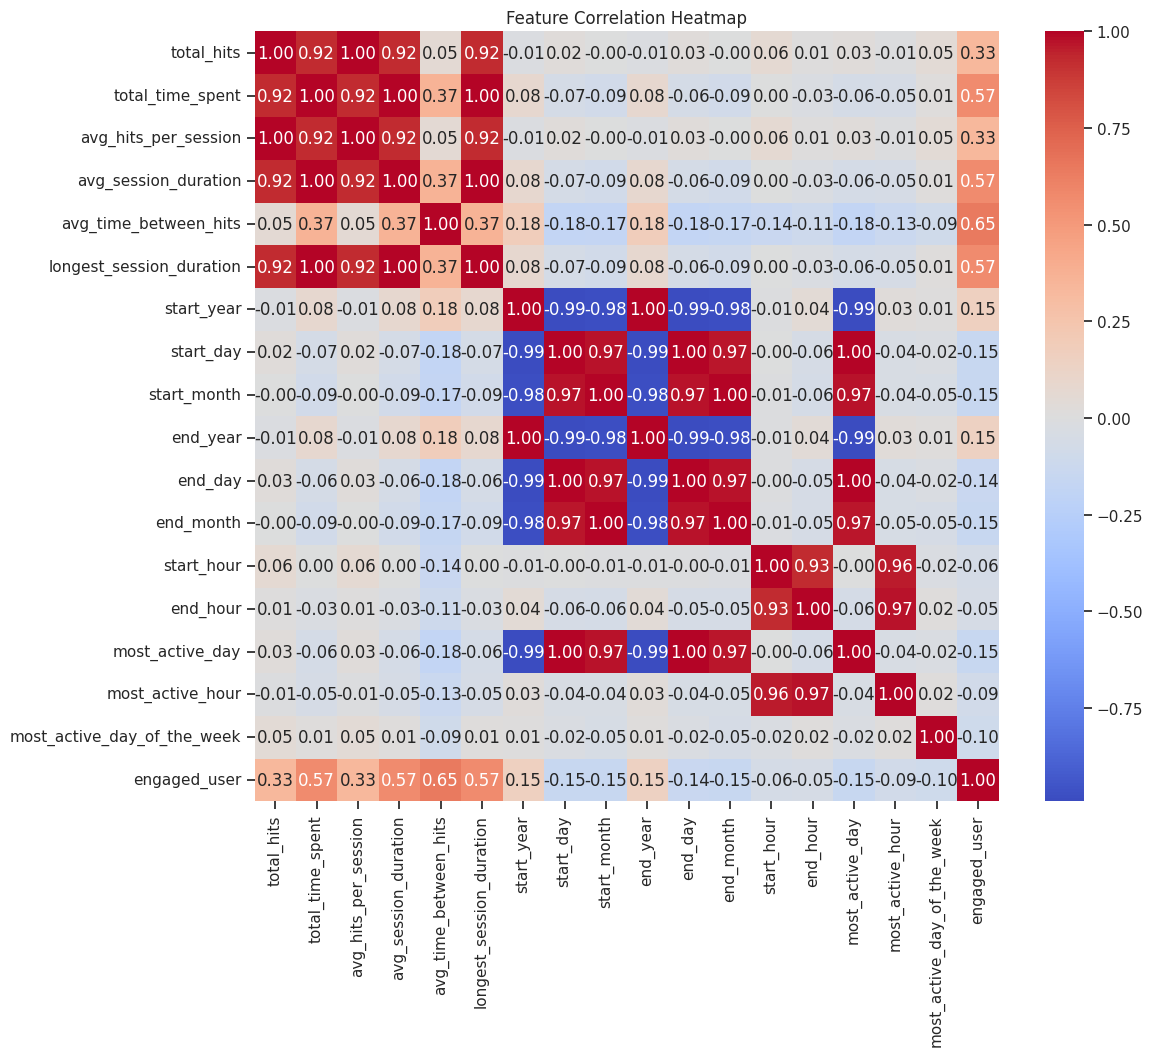

In [ ]:
#Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

The color intensity in each box represent the strength of correlation between the adjacent features. The annotation inside each box shows the correlation coefficient

### First we will conduct feature selection using SelectKBest (uing f_classif method).

SelectKBest is a statistical method that selects the top 'k' features based on their statistical significance with the target variable.

SelectKBest is useful for a quick initial selection of the most relevant features based on their statistical significance, which can give insights into feature importance and guide further analysis.

The f_classif method is generally used for classification tasks, and it evaluates the ANOVA F-statistic between the features and the target variable to assess the correlation between each feature and the target. It is particularly suitable for numerical features and classification tasks

In [ ]:
# Feature Selection using SelectKBest (f_classif method)
from sklearn.feature_selection import SelectKBest, f_classif

# Set k as the number of top features you want to keep
k = 6
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
(X_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X_train.columns[selected_feature_indices]

In [ ]:
selected_features

Index(['total_hits', 'total_time_spent', 'avg_hits_per_session',
       'avg_session_duration', 'avg_time_between_hits',
       'longest_session_duration'],
      dtype='object')

In [ ]:
#First training will be done using these sets of features
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [ ]:
X_train1.head()

,total_hits,total_time_spent,avg_hits_per_session,avg_session_duration,avg_time_between_hits,longest_session_duration
0,-0.385193,-0.463565,-0.385193,-0.463565,-0.273845,-0.463565
1,-0.315103,-0.410200,-0.315103,-0.410200,-0.217041,-0.410200
2,1.857681,2.151316,1.857681,2.151316,0.515100,2.151316
3,-0.315103,1.084018,-0.315103,1.084018,6.145009,1.084018
4,-0.525373,-0.570295,-0.525373,-0.570295,-0.557865,-0.570295


###Next carryout feature selection using RFE

Recursive Feature Elimination (RFE) is a recursive method that eliminates the least important features step-by-step until the desired number of features is reached. RFE allows for more exhaustive exploration of feature combinations, which can help in finding a subset of features that collectively contribute to better model performance.

In [ ]:

# Feature Selection using Recursive Feature Elimination (RFE)
# You can use any model of your choice for RFE, here we use Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=k)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Get the indices of the selected features from RFE
rfe_selected_feature_indices = rfe.get_support(indices=True)

# Get the names of the selected features from RFE
rfe_selected_features = X_train.columns[rfe_selected_feature_indices]

In [ ]:
print (rfe_selected_features)
print(rfe_selected_features == selected_features)

Index(['total_hits', 'total_time_spent', 'avg_hits_per_session',
       'avg_session_duration', 'avg_time_between_hits',
       'longest_session_duration'],
      dtype='object')
[ True  True  True  True  True  True]


From comparing the selected features gotten using SelectKBest and that gotten using RFE, one can see that there are exactly the same set of features. So we can stick to using X_train1 since both methods will lead to the same train dataset

### Principal Component Analysis

PCA is a dimensionality reduction technique that helps in identifying the most important features in a dataset.

In [ ]:

# Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

# Choose the number of components you want to retain (e.g., n_components = 5)
n_components = 7
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


# Convert the PCA-transformed arrays back to dataframes
X_train2 = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(n_components)])
X_test2 = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(n_components)])

In [ ]:
X_train2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.730892,-3.500313,0.021586,-1.698576,-0.565910,0.059479,0.189986
1,0.348665,-3.017370,3.056043,-1.003890,-1.090476,0.171119,-0.363457
2,0.838198,4.250553,-0.787883,0.507473,-0.402556,-0.175012,-0.256682
3,3.353060,-1.532689,1.032834,0.305126,5.168647,0.533566,-0.020047
4,-3.526753,0.251447,-2.076573,-1.531163,0.181211,-0.145364,0.185683


We cannot get the exact feature name of each PCA component because every PCA components is made from a combination of several components, i.e the components are not gotten from just selecting the features singly.

PCA is not about selecting the best features; rather, it's about transforming the data into a new set of uncorrelated variables called principal components. Each principal component is a linear combination of all the original features. The principal components capture the maximum variance in the data.

When you transform your data using PCA, the resulting principal components are combinations of all the original features, not individual features. This is why there's no direct correspondence between each principal component and a single original feature.

However we can identify which original features contribute the most to each principal component, by looking at the pca.components_ attribute. Each row of this matrix represents a principal component, and each column corresponds to a feature. The values in this matrix indicate the weight of each original feature in the creation of the principal component.

The below code shows the most influential features that contribute in the creation of each components

In [ ]:



# Convert the PCA components matrix to a DataFrame
pca_components_df = pd.DataFrame(pca.components_, columns=X_train.columns)

# Print the top contributing features for each principal component
for i in range(n_components):
    print(f"Principal Component {i+1} Top Contributing Features:")
    top_features = pca_components_df.iloc[i].sort_values(ascending=False).head(3)  # Choose the top 3 features
    print(top_features)
    print("\n")

Principal Component 1 Top Contributing Features:
longest_session_duration    0.325221
total_time_spent            0.325221
avg_session_duration        0.325221
Name: 0, dtype: float64


Principal Component 2 Top Contributing Features:
avg_session_duration        0.323072
longest_session_duration    0.323072
total_time_spent            0.323072
Name: 1, dtype: float64


Principal Component 3 Top Contributing Features:
avg_time_between_hits       0.139478
longest_session_duration    0.016923
avg_session_duration        0.016923
Name: 2, dtype: float64


Principal Component 4 Top Contributing Features:
avg_time_between_hits          0.213972
most_active_day_of_the_week    0.092106
end_month                      0.005589
Name: 3, dtype: float64


Principal Component 5 Top Contributing Features:
avg_time_between_hits    0.893489
end_hour                 0.152658
most_active_hour         0.149652
Name: 4, dtype: float64


Principal Component 6 Top Contributing Features:
avg_hits_per_session 

##Model Selection

#### For this problem we have chosen to train our model using three models namely Logistic Regression, K nearest neighbors and Random due to the following reason

Logistic Regression:
Logistic Regression is still a suitable model for this problem, given that it's a binary classification task. The objective is to predict whether a user will return to the same session (engaged) or not (non-engaged) based on the given features, considering a 5 minutes break. The output of the logistic regression model is the probability of a user being engaged, which can be thresholded to make binary predictions.

Logistic Regression's interpretability remains valuable in this context, as it allows us to understand the impact of each session-level and temporal feature on user engagement. We can determine whether features like session duration, time between hits, or specific temporal patterns significantly influence the likelihood of users returning after a 5 minutes break. Additionally, the simplicity and computational efficiency of Logistic Regression make it suitable for this task, especially when dealing with large-scale user data.

K-Nearest Neighbors (KNN):
KNN can still be a reasonable choice for this problem, considering its ability to handle complex and non-linear relationships. It can effectively capture temporal patterns and interactions between session-level features, which are crucial for predicting user engagement after a 5 minutes break.

In this context, KNN can help identify users with similar session behavior and temporal patterns. If users with similar patterns tend to return after a 5 minutes break, KNN can make accurate predictions. For example, if users who tend to have shorter session durations and frequent hits within sessions are more likely to come back after a 5 minutes break, KNN can capture such non-linear relationships and provide meaningful predictions.

However, it is essential to choose the appropriate value of K to balance the trade-off between bias and variance. Selecting a small K value may result in noisy predictions, while a large K value might oversmooth the data and lead to inaccurate predictions.

Random Forest:
Random Forest can still be a powerful model for this problem, particularly due to its ability to handle high-dimensional data and complex interactions between session-level and temporal features. The temporal nature of the problem can result in intricate patterns and dependencies that Random Forest can effectively capture.

The ensemble nature of Random Forest, where multiple decision trees are combined, allows it to handle non-linear relationships and provide reliable predictions. By aggregating the results from multiple trees, the model reduces the risk of overfitting and ensures robust performance.

Additionally, Random Forest's feature importance scores can help identify the most influential features for predicting user engagement after a 5 minutes break. This information can be invaluable for understanding the specific session and temporal behaviors that lead to higher engagement rates.

#### We choose not to use models like Naive Bayes Classification, Decision trees and Support vector machine and here's why

While models like simple Decision Trees, Naive Bayes Classification, and Support Vector Machines (SVM) are valid and widely-used algorithms in machine learning, there are specific reasons why they might not be the best choices for the problem of predicting whether a user will come back to the same session after a 5 minutes break:

Simple Decision Trees:
Simple Decision Trees are prone to overfitting, especially when dealing with high-dimensional data like user profiles with many session-level and temporal features. The nature of the problem involves complex interactions and patterns between these features, and a simple Decision Tree may not have enough depth to capture them accurately. Overfitting can lead to poor generalization and reduced predictive performance on unseen data.

Naive Bayes Classification:
Naive Bayes assumes that all features are conditionally independent, which might not be suitable for this problem. In the context of user engagement prediction, many features are likely to have dependencies and interactions with each other. Naive Bayes might fail to capture these dependencies, leading to suboptimal predictions.

Support Vector Machines (SVM):
SVMs can perform well in binary classification tasks, but their effectiveness is influenced by the choice of the kernel function and hyperparameters. In this problem, the relationships between session-level features and temporal patterns might be highly non-linear, and choosing the appropriate kernel can be challenging. Moreover, SVM might not scale well to large datasets with numerous features.

###Determining the performance metrics to use


####The three most important performance metrics for this problem in order of importance are:

- Recall:
Recall, also known as sensitivity or true positive rate, measures the ratio of correctly predicted positive observations to the total actual positives (users who actually re-engaged). Recall is a crucial performance metric in the context of this problem statement – predicting whether a user will come back to the same session after a 5-minute break. The reason Recall is particularly important in this scenario is because the cost of false negatives (missed opportunities to identify users who will re-engage) is potentially higher than the cost of false positives (users who are incorrectly identified as likely to re-engage). The primary goal is to identify users who are likely to re-engage. Missing out on such users can result in lost opportunities, which may have significant implications for the platform's success. High Recall ensures that a larger proportion of users who would have re-engaged are correctly identified, leading to increased user engagement. High recall is essential because it captures a significant portion of users who might potentially re-engage. Missing out on users who could have been successfully nudged to re-engage can lead to lost opportunities.
Recall is the most important metric for the user re-engagement problem due to its focus on capturing potential re-engagements, minimizing missed opportunities, and guiding strategic decisions. While Recall is paramount, it's also important to consider a balanced approach that incorporates other metrics like Precision and F1-score to ensure a holistic evaluation of the model's performances.



- Precision: Precision measures the proportion of predicted positive cases (users reengaging) that are actually true positive cases (users who do come back), and it is directly related to the goal of increasing user reengagement. False positives (predicting reengagement when it won't happen) are not desirable as they might lead to unnecessary actions targeting those users, which could negatively impact their experience. High precision means that when the model predicts reengagement, it's more likely to be accurate. Consistently sending relevant notifications increases user trust and engagement with your app or platform. If users receive valuable nudges that align with their interests, they are more likely to engage positively and trust your recommendations in the future. Precision is especially important when considering resource allocation for reengagement strategies. Since we are planning to send a nudge to users to encourage them to reengage, we want to make sure we're targeting the right users. High precision ensures that our efforts are focused on users who are more likely to return, leading to more effective resource utilization


- F1-score:
The F1 score is the harmonic mean of precision and recall, providing a balanced measure between the two. It's particularly useful when there's an uneven class distribution or a trade-off between precision and recall. Given the importance of both precision and recall in re-engagement prediction, the F1 score is a valuable metric for assessing the overall performance of the model.

## Model Training

### Logistic Regression

First set of features

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Train the Logistic Regression model
logreg_model1 = LogisticRegression()
logreg_model1.fit(X_train1, y_train)

# Make predictions on the test set
y_pred = logreg_model1.predict(X_test1)

# Evaluate the performance of the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Recall: 0.8
Precision: 0.5217391304347826
F1 Score: 0.6315789473684211


Second set of features

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Train the Logistic Regression model
logreg_model2 = LogisticRegression()
logreg_model2.fit(X_train2, y_train)

# Make predictions on the test set
y_pred = logreg_model2.predict(X_test2)

# Evaluate the performance of the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Recall: 0.8666666666666667
Precision: 0.5909090909090909
F1 Score: 0.7027027027027029


### K Nearest neighbors

For first sets of features

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Train the KNN model
knn_model1 = KNeighborsClassifier()
knn_model1.fit(X_train1, y_train)

# Make predictions on the test set
y_pred = knn_model1.predict(X_test1)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, knn_model1.predict_proba(X_test1)[:, 1])

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Recall: 1.0
Precision: 0.5555555555555556
F1 Score: 0.7142857142857143


For second set of features

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Train the KNN model
knn_model2 = KNeighborsClassifier()
knn_model2.fit(X_train2, y_train)

# Make predictions on the test set
y_pred = knn_model2.predict(X_test2)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, knn_model2.predict_proba(X_test2)[:, 1])

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Recall: 0.8666666666666667
Precision: 0.52
F1 Score: 0.65


### Random Forest

For first set of features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Train the Random Forest model
rf_model1 = RandomForestClassifier()
rf_model1.fit(X_train1, y_train)

# Make predictions on the test set
y_pred = rf_model1.predict(X_test1)

# Evaluate the performance of the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Recall: 0.9333333333333333
Precision: 0.6363636363636364
F1 Score: 0.7567567567567568


For second sets of features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Train the Random Forest model
rf_model2 = RandomForestClassifier()
rf_model2.fit(X_train2, y_train)

# Make predictions on the test set
y_pred = rf_model2.predict(X_test2)

# Evaluate the performance of the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.7368421052631579
Recall: 0.9333333333333333
F1 Score: 0.8235294117647058


As observed from the above models and their performance,
The recall is very good for most models, it is highest with a value of 1.0 when we train with K Nearest neighbors using the features selected using SelectKBest. Next best recall is when we train with random forest using the features selected using SelectKBest where we get a recall of 0.933.



Precision and F1 score however are not having very impressive values, The best precision is when we train with Random forest using the PCA generated features. The worst precision is when we train with Logistic Regression using features generated with SelectKBest.

The F1 score perform better when we train with Random forest than when we use the other two models.

Overall the best performance is found when the model is trained using Random Forest.

With the model trained using SelectKbest having an overall perform of:
Recall: 0.9333333333333333
Precision: 0.6086956521739131
F1 Score: 0.7368421052631579

And the model trained using PCA generated features having the second best  overall performance.


We need to figure out a way to improve the precision  and  further improve the recall of our model. Improving the F1 score should also be done to ensure that the trade off between recall and precision is taken care of for an overall improved performance. We want to send nudge to as many true positive as possible not missing any if possible while still ensuring that when we send a nudge or notification to users, it's majorly to those who are likely to re-engage. High recall means that we don't miss any user who is likely to re-engage and needs our nudge as a reminder.  High Precision means that a larger proportion of users who receive the nudge will actually re-engage. This minimizes the chances of sending notifications to users who might not be interested, thereby reducing potential annoyance and improving the user experience.

High recall indicates that both precision and recall are at good values




**Overall we prioritize Recall since it is the most important performance metrics for our problem statement**

##Model Optimization

### Remove Outliers

First remove outliers for the dataset before train test split  to see if that has an positive impact on the models

In [ ]:
categorical_features

['Citizen ID', 'most_active_day_of_the_week']

In [ ]:
one_session_profiles.head()

,Citizen ID,total_hits,total_time_spent,avg_hits_per_session,avg_session_duration,avg_time_between_hits,longest_session_duration,start_year,start_day,start_month,end_year,end_day,end_month,start_hour,end_hour,most_active_day,most_active_hour,most_active_day_of_the_week,engaged_user
1,4fcaa6daae60e44a1900000b,3,120.0,3.0,120.0,40.000000,120.0,2015,1,1,2015,1,1,3,3,1,3,Thursday,0
3,5013adf30454e27ae4000002,1,0.0,1.0,0.0,0.000000,0.0,2015,1,2,2015,1,2,22,22,1,22,Sunday,0
8,503e4ee6ba40af242000019d,11,600.0,11.0,600.0,54.545455,600.0,2014,29,12,2014,29,12,15,15,29,15,Monday,0
10,503e64b2ba40af2411000187,6,1320.0,6.0,1320.0,220.000000,1320.0,2015,1,1,2015,1,1,17,18,1,17,Thursday,1
11,503e8046ba40af24200003e6,3,120.0,3.0,120.0,40.000000,120.0,2015,1,3,2015,1,3,22,22,1,22,Sunday,0


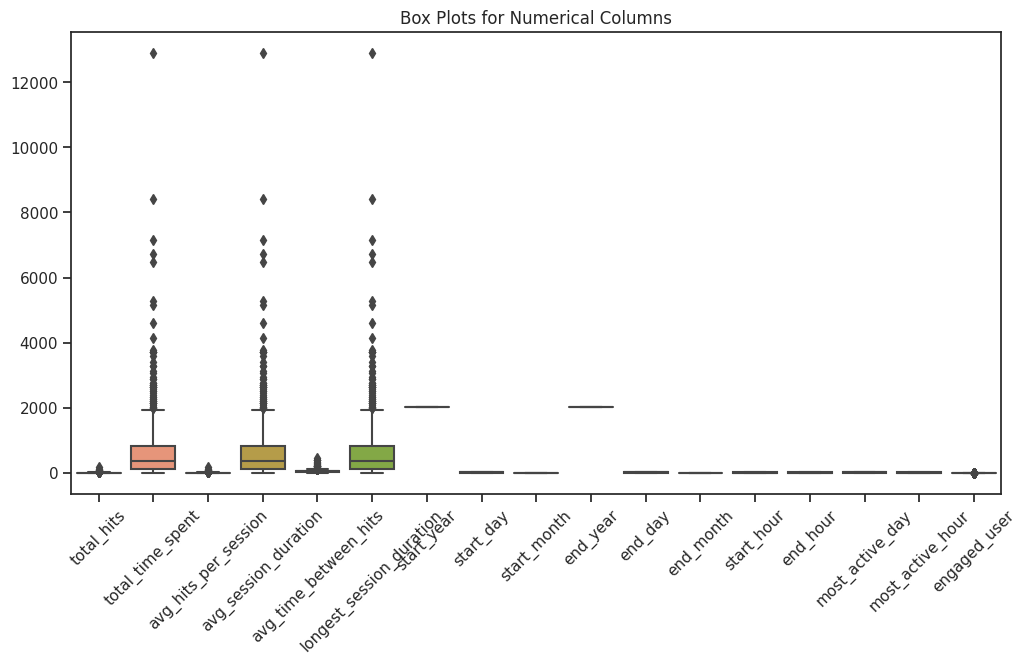

In [ ]:
#Check for outliers using box plot

# Identify numerical columns
numerical_columns = one_session_profiles.select_dtypes(include=[np.number]).columns

# Create box plots for numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=one_session_profiles[numerical_columns])
plt.xticks(rotation=45)
plt.title("Box Plots for Numerical Columns")
plt.show()

In [ ]:

#Count the number of outliers using the interquartile range method

# Calculate Q1, Q3, and IQR for each numerical column
Q1 = one_session_profiles[numerical_columns].quantile(0.25)
Q3 = one_session_profiles[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in each numerical column
outliers_count = ((one_session_profiles[numerical_columns] < lower_bound) | (one_session_profiles[numerical_columns] > upper_bound)).sum()

print("Number of outliers in each numerical column:")
print(outliers_count)

Number of outliers in each numerical column:
total_hits                  45
total_time_spent            53
avg_hits_per_session        45
avg_session_duration        53
avg_time_between_hits       48
longest_session_duration    53
start_year                   0
start_day                    0
start_month                  0
end_year                     0
end_day                      0
end_month                    0
start_hour                   0
end_hour                     0
most_active_day              0
most_active_hour             0
engaged_user                86
dtype: int64


In [ ]:
import pandas as pd

# Calculate Q1, Q3, and IQR for each numerical column
Q1 = one_session_profiles[numerical_features].quantile(0.25)
Q3 = one_session_profiles[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find rows where any numerical column has values below the lower bound or above the upper bound
outliers_mask = (one_session_profiles[numerical_features] < lower_bound) | (one_session_profiles[numerical_features] > upper_bound)

# Remove rows with outliers
cleaned_one_session_profiles = one_session_profiles[~outliers_mask.any(axis=1)]

print("Number of rows before removing outliers:", one_session_profiles.shape[0])
print("Number of rows after removing outliers:", cleaned_one_session_profiles.shape[0])

Number of rows before removing outliers: 583
Number of rows after removing outliers: 490


In [ ]:
#now overwrite the data
one_session_profiles = cleaned_one_session_profiles

Carryout same steps as in the first iteration to model training and evaluation to assess the impact of removing outliers

In [ ]:

#Seperate the features from the label

label = one_session_profiles.engaged_user
features = one_session_profiles.drop(['Citizen ID', 'engaged_user'], axis=1)

In [ ]:

#Carry out train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [ ]:

#Carryout Label Encoding

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform 'most_active_day_of_the_week' using label encoding
X_train['most_active_day_of_the_week'] = label_encoder.fit_transform(X_train['most_active_day_of_the_week'])
X_test['most_active_day_of_the_week'] = label_encoder.transform(X_test['most_active_day_of_the_week'])


# Print the DataFrame with the new encoded column
X_train.head()

,total_hits,total_time_spent,avg_hits_per_session,avg_session_duration,avg_time_between_hits,longest_session_duration,start_year,start_day,start_month,end_year,end_day,end_month,start_hour,end_hour,most_active_day,most_active_hour,most_active_day_of_the_week
650,1,0.0,1.0,0.0,0.000000,0.0,2014,26,12,2014,26,12,18,18,26,18,0
259,11,780.0,11.0,780.0,70.909091,780.0,2015,1,4,2015,1,4,11,11,1,11,6
846,1,0.0,1.0,0.0,0.000000,0.0,2015,1,3,2015,1,3,1,1,1,1,3
818,14,780.0,14.0,780.0,55.714286,780.0,2015,1,2,2015,1,2,8,8,1,8,3
941,5,240.0,5.0,240.0,48.000000,240.0,2015,1,5,2015,1,5,15,15,1,15,0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Get the numerical features (excluding 'most_active_day_of_the_week' which has already been label encoded)
numerical_features = X_train.select_dtypes(include=['number']).drop(columns=['most_active_day_of_the_week']).columns

# Apply standard scaling to numerical features
standard_scaler = StandardScaler()
X_train[numerical_features] = standard_scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = standard_scaler.transform(X_test[numerical_features])

# Now only the numerical features except 'most_active_day_of_the_week' are standardized.

In [ ]:
#Carryout resampling

from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(sampling_strategy='auto')

# Fit and transform the training data to upsample the minority class
X_train_upsampled, y_train_upsampled = smote.fit_resample(X_train, y_train)

In [ ]:
#overwrite train data

X_train = X_train_upsampled
y_train = y_train_upsampled

In [ ]:

# Feature Selection using Recursive Feature Elimination (RFE)
# You can use any model of your choice for RFE, here we use Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
k=6
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=k)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Get the indices of the selected features from RFE
rfe_selected_feature_indices = rfe.get_support(indices=True)

# Get the names of the selected features from RFE
rfe_selected_features = X_train.columns[rfe_selected_feature_indices]

In [ ]:
#First training will be done using these sets of features
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [ ]:

# Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

# Choose the number of components you want to retain (e.g., n_components = 5)
n_components = 7
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


# Convert the PCA-transformed arrays back to dataframes
X_train2 = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(n_components)])
X_test2 = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(n_components)])

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Train the Logistic Regression model
logreg_model1 = LogisticRegression()
logreg_model1.fit(X_train1, y_train)

# Make predictions on the test set
y_pred = logreg_model1.predict(X_test1)

# Evaluate the performance of the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.4
Recall: 1.0
F1 Score: 0.5714285714285715


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Train the Logistic Regression model
logreg_model2 = LogisticRegression()
logreg_model2.fit(X_train2, y_train)

# Make predictions on the test set
y_pred = logreg_model2.predict(X_test2)

# Evaluate the performance of the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.4
Recall: 0.6666666666666666
F1 Score: 0.5


K Nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Train the KNN model
knn_model1 = KNeighborsClassifier()
knn_model1.fit(X_train1, y_train)

# Make predictions on the test set
y_pred = knn_model1.predict(X_test1)

# Evaluate the performance of the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8333333333333334
Recall: 0.8333333333333334
F1 Score: 0.8333333333333334


In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Train the KNN model
knn_model2 = KNeighborsClassifier()
knn_model2.fit(X_train2, y_train)

# Make predictions on the test set
y_pred = knn_model2.predict(X_test2)

# Evaluate the performance of the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.375
Recall: 0.5
F1 Score: 0.42857142857142855


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Train the Random Forest model
rf_model1 = RandomForestClassifier()
rf_model1.fit(X_train1, y_train)

# Make predictions on the test set
y_pred = rf_model1.predict(X_test1)

# Evaluate the performance of the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8
Recall: 0.6666666666666666
F1 Score: 0.7272727272727272


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Train the Random Forest model
rf_model2 = RandomForestClassifier()
rf_model2.fit(X_train2, y_train)

# Make predictions on the test set
y_pred = rf_model2.predict(X_test2)

# Evaluate the performance of the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.75
Recall: 0.5
F1 Score: 0.6


Note:

Removing the Outliers led to a little(insignificant) increase in most cases and in some cases a decrease in the performance of the models.

However we had a very good performance for the model trained on KNN using features generated using RFE


Let's try other approaches.

### Hyperparameter tuning of models

In [ ]:
#Hyperparameter tuning of Logistics Regression using the first selected features

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

# Define the parameter grid
param_grid = {
    'penalty': ['l2'],  # Use L2 penalty
    'C': [0.01, 0.1, 1],
    'max_iter': [100, 200],
}

# Create the LogisticRegression instance
logreg = LogisticRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='precision', verbose=2)

# Fit the model
grid_search.fit(X_train1, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_model.predict(X_test1)
recall = recall_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Best Recall:", recall)
, y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...................C=0.01, max_iter=100, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, max_iter=100, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, max_iter=100, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, max_iter=100, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, max_iter=100, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, max_iter=200, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, max_iter=200, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, max_iter=200, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, max_iter=200, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, max_iter=200, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, max_iter=100, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, max_iter=100,

'y_test)'

No noticable improvement in the precision

In [ ]:
#Hyperparameter tuning of Logistics Regression using the second selected features

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

# Define the parameter grid
param_grid = {
    'penalty': ['l2'],  # Use L2 penalty
    'C': [0.01, 0.1, 1],
    'max_iter': [100, 200],
}

# Create the LogisticRegression instance
logreg = LogisticRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='precision', verbose=2)

# Fit the model
grid_search.fit(X_train2, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_model.predict(X_test2)
recall = recall_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Best Recall:", recall)
, y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...................C=0.01, max_iter=100, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, max_iter=100, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, max_iter=100, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, max_iter=100, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, max_iter=100, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, max_iter=200, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, max_iter=200, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, max_iter=200, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, max_iter=200, penalty=l2; total time=   0.0s
[CV] END ...................C=0.01, max_iter=200, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, max_iter=100, penalty=l2; total time=   0.0s
[CV] END ....................C=0.1, max_iter=100,

'y_test)'

In [ ]:
#Hyperparameter tuning for K Nearest neighbors using the first selected features

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'p': [1, 2],  # L1 or L2 distance metric
}

# Create the GridSearchCV object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='precision')

# Fit the model
grid_search.fit(X_train1, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test1)

# Calculate performance metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Best Parameters:", best_params)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Precision: 0.8
Recall: 0.6666666666666666
F1 Score: 0.7272727272727272


In [ ]:
#Hyperparameter tuning for K Nearest neighbors using the second selected features

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'p': [1, 2],  # L1 or L2 distance metric
}

# Create the GridSearchCV object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='precision')

# Fit the model
grid_search.fit(X_train2, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test2)

# Calculate performance metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Best Parameters:", best_params)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Precision: 0.5
Recall: 0.5
F1 Score: 0.5


In [ ]:
#Hyperparameter tuning for Random Forest using the first selected features


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid with a wider range of values
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [ 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10, 15],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 8]  # Minimum number of samples required to be at a leaf node
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='precision')

# Fit the model
grid_search.fit(X_train1, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test1)

# Calculate performance metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Best Parameters:", best_params)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Precision: 0.8
Recall: 0.6666666666666666
F1 Score: 0.7272727272727272


In [ ]:
#Hyperparameter tuning for Random Forest using the second selected features


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid with a wider range of values
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [ 10, 20, 30, 50],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10, 15],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 8]  # Minimum number of samples required to be at a leaf node
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='precision')

# Fit the model
grid_search.fit(X_train2, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test2)

# Calculate performance metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Best Parameters:", best_params)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Precision: 0.75
Recall: 0.5
F1 Score: 0.6


From observation from all the models we've trained so far. We can deduct that models trained using features selected using RFE generally perform better than models trained using features generated by PCA.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Define the specific hyperparameters
rf_params = {
    'max_depth': 10,
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 100,
    'random_state': 42  # For reproducibility
}

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(**rf_params)
rf_model.fit(X_train1, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test1)

# Evaluate the performance of the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8
Recall: 0.6666666666666666
F1 Score: 0.7272727272727272


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Define the specific hyperparameters
rf_params = {
    'max_depth': 10,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 100,
    'random_state': 42  # For reproducibility
}

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(**rf_params)
rf_model.fit(X_train2, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test2)

# Evaluate the performance of the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.75
Recall: 0.5
F1 Score: 0.6


The above training for Random Forest using the best parameters gotten from hyper parameter tuning further strengthens the point that our models generally perform better when we train using features generated using RFE than when we use the PCA components features.

####all the tuning methods we used only led to a slight increase in the precision of the various models

####however Random forest when done with the right sets of features gotten by PCA and the right hyper parameters gotten through our Gridsearch tuning led to a significant improvement in precision

### Now lets tryout a different approach.  Carryout training using the complete dataset of all users including those that had more than one session

In [ ]:
user_profile.head()

,Citizen ID,num_sessions,total_hits,total_time_spent,avg_hits_per_session,avg_session_duration,avg_time_between_hits,longest_session_duration,start_year,start_day,start_month,end_year,end_day,end_month,start_hour,end_hour,most_active_day,most_active_hour,most_active_day_of_the_week,engaged_user
0,4d5835cc2a82e278e6000028,2,32,4440.0,16.0,2220.0,652.068966,2880.0,2015,1,5,2015,1,5,9,15,1,9,Friday,1
1,4fcaa6daae60e44a1900000b,1,3,120.0,3.0,120.0,40.000000,120.0,2015,1,1,2015,1,1,3,3,1,3,Thursday,0
2,50085cfc44dff81137000020,2,2,0.0,1.0,0.0,169890.000000,0.0,2014,28,12,2015,1,1,22,20,1,20,Sunday,1
3,5013adf30454e27ae4000002,1,1,0.0,1.0,0.0,0.000000,0.0,2015,1,2,2015,1,2,22,22,1,22,Sunday,0
4,503e2b5eba40af242e000052,3,12,540.0,4.0,180.0,42876.000000,540.0,2014,26,12,2014,29,12,13,17,26,13,Friday,1


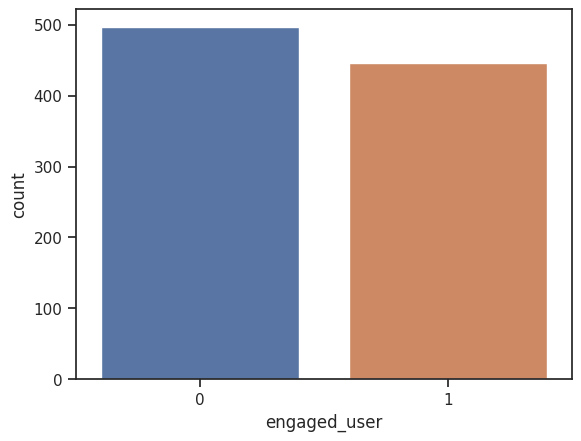

In [ ]:
# Show the balanced class distribution
sns.countplot(x='engaged_user', data=user_profile)
plt.show()

The data is balanced, there are almost equal amount of the two class

#### Carryout data cleaning

In [ ]:

# Check for missing values in the DataFrame
missing_values = user_profile.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Citizen ID                     0
num_sessions                   0
total_hits                     0
total_time_spent               0
avg_hits_per_session           0
avg_session_duration           0
avg_time_between_hits          0
longest_session_duration       0
start_year                     0
start_day                      0
start_month                    0
end_year                       0
end_day                        0
end_month                      0
start_hour                     0
end_hour                       0
most_active_day                0
most_active_hour               0
most_active_day_of_the_week    0
engaged_user                   0
dtype: int64


No missing value

In [ ]:
# Check for duplicate rows
duplicates = user_profile.duplicated()
print("Duplicate Rows:")
print(user_profile[duplicates])

Duplicate Rows:
Empty DataFrame
Columns: [Citizen ID, num_sessions, total_hits, total_time_spent, avg_hits_per_session, avg_session_duration, avg_time_between_hits, longest_session_duration, start_year, start_day, start_month, end_year, end_day, end_month, start_hour, end_hour, most_active_day, most_active_hour, most_active_day_of_the_week, engaged_user]
Index: []


In [ ]:
# Select numerical features
numerical_features = user_profile.select_dtypes(include=[int, float]).columns.tolist()

# Select categorical features
categorical_features = user_profile.select_dtypes(include=['object']).columns.tolist()

# Print the features
print(categorical_features)
print(numerical_features)

['Citizen ID', 'most_active_day_of_the_week']
['num_sessions', 'total_hits', 'total_time_spent', 'avg_hits_per_session', 'avg_session_duration', 'avg_time_between_hits', 'longest_session_duration', 'start_year', 'start_day', 'start_month', 'end_year', 'end_day', 'end_month', 'start_hour', 'end_hour', 'most_active_day', 'most_active_hour', 'engaged_user']


In [ ]:
# Separate the Citizen ID column to help map future prediction
citizen_ids = user_profile['Citizen ID']
citizen_ids

0      4d5835cc2a82e278e6000028
1      4fcaa6daae60e44a1900000b
2      50085cfc44dff81137000020
3      5013adf30454e27ae4000002
4      503e2b5eba40af242e000052
                 ...           
938    54aaa28a9cd1187eeb0000cf
939    54aaa4f4bb7b565415000023
940    54aaa579bb7b563483000398
941    54aaaba29cd1180cf7000070
942    54aac9549cd11825500000f8
Name: Citizen ID, Length: 943, dtype: object

In [ ]:
#Seperate the features from the label

label = user_profile.engaged_user
features = user_profile.drop(['Citizen ID', 'engaged_user'], axis=1)

In [ ]:
#Carry out train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform 'most_active_day_of_the_week' using label encoding
X_train['most_active_day_of_the_week'] = label_encoder.fit_transform(X_train['most_active_day_of_the_week'])
X_test['most_active_day_of_the_week'] = label_encoder.transform(X_test['most_active_day_of_the_week'])


# Print the DataFrame with the new encoded column
X_train.head()

,num_sessions,total_hits,total_time_spent,avg_hits_per_session,avg_session_duration,avg_time_between_hits,longest_session_duration,start_year,start_day,start_month,end_year,end_day,end_month,start_hour,end_hour,most_active_day,most_active_hour,most_active_day_of_the_week
244,1,5,420.0,5.0,420.0,84.000000,420.0,2015,1,5,2015,1,5,17,17,1,17,0
82,1,4,180.0,4.0,180.0,45.000000,180.0,2014,29,12,2014,29,12,17,17,29,17,1
316,3,54,3300.0,18.0,1100.0,9245.164835,1740.0,2014,24,12,2014,28,12,5,22,28,5,3
350,2,13,1200.0,6.5,600.0,435.833333,960.0,2015,1,1,2015,1,1,16,17,1,16,4
465,1,7,360.0,7.0,360.0,51.428571,360.0,2014,25,12,2014,25,12,7,7,25,7,4


In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_train_standardized = standard_scaler.fit_transform(X_train)
X_test_standardized = standard_scaler.transform(X_test)

#Convert back to Pandas DataFrames
X_train = pd.DataFrame(X_train_standardized, columns=X_train.columns)
X_test = pd.DataFrame(X_test_standardized, columns=X_test.columns)

In [ ]:

# Feature Selection using Recursive Feature Elimination (RFE)
# You can use any model of your choice for RFE, here we use Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
k=6
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=k)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Get the indices of the selected features from RFE
rfe_selected_feature_indices = rfe.get_support(indices=True)

# Get the names of the selected features from RFE
rfe_selected_features = X_train.columns[rfe_selected_feature_indices]



#First training will be done using these sets of features
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [ ]:
#Principal Component Analysis (PCA) using 10 as the number of required features
from sklearn.decomposition import PCA

# Choose the number of components you want to retain (e.g., n_components = 5)
n_components = 7
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


# Convert the PCA-transformed arrays back to dataframes
X_train2 = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(n_components)])
X_test2 = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(n_components)])

In [ ]:


#Train with Logistic Regression- RFE features

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

# Train the Logistic Regression model
logreg_model2 = LogisticRegression()
logreg_model2.fit(X_train1, y_train)

# Make predictions on the test set
y_pred = logreg_model2.predict(X_test1)

# Evaluate the performance of the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 1.0
Recall: 0.8144329896907216
F1 Score: 0.8977272727272727


In [ ]:


#Train with Logistic Regression -PCA features

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

# Train the Logistic Regression model
logreg_model2 = LogisticRegression()
logreg_model2.fit(X_train2, y_train)

# Make predictions on the test set
y_pred = logreg_model2.predict(X_test2)

# Evaluate the performance of the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9868421052631579
Recall: 0.7731958762886598
F1 Score: 0.8670520231213872


In [ ]:
##Train with KNN -RFE features


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Train the KNN model
knn_model2 = KNeighborsClassifier()
knn_model2.fit(X_train1, y_train)

# Make predictions on the test set
y_pred = knn_model2.predict(X_test1)

# Evaluate the performance of the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.978494623655914
Recall: 0.9381443298969072
F1 Score: 0.9578947368421052


In [ ]:
##Train with KNN -PCA features


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Train the KNN model
knn_model2 = KNeighborsClassifier()
knn_model2.fit(X_train2, y_train)

# Make predictions on the test set
y_pred = knn_model2.predict(X_test2)

# Evaluate the performance of the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9722222222222222
Recall: 0.7216494845360825
F1 Score: 0.8284023668639052


In [ ]:
#Using Random Forest with all the predetermined hyper parameters and RFE features

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Define the specific hyperparameters
rf_params = {
    'max_depth': 10,
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 100,
    'random_state': 42  # For reproducibility
}

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(**rf_params)
rf_model.fit(X_train1, y_train)

# Make predictions on the test set
y_pred1 = rf_model.predict(X_test1)

# Evaluate the performance of the model
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9787234042553191
Recall: 0.9484536082474226
F1 Score: 0.963350785340314


In [ ]:
#Using Random Forest with all the predetermined hyper parameters and PCA features

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  precision_score, recall_score, f1_score

# Define the specific hyperparameters
rf_params = {
    'max_depth': 10,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 100,
    'random_state': 42  # For reproducibility
}

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(**rf_params)
rf_model.fit(X_train2, y_train)

# Make predictions on the test set
y_pred2 = rf_model.predict(X_test2)

# Evaluate the performance of the model
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9873417721518988
Recall: 0.8041237113402062
F1 Score: 0.8863636363636364


From the above, it can be seen that the best performing model is Random Forest


And the best case is when we use the features generated using RFE

###View prediction results based on Citizen ID

In [ ]:


# Get the indexes of the predictions (which are the same as indexes of X_test)
prediction_indexes = X_test1.index

# Print the indexes
print(prediction_indexes)

RangeIndex(start=0, stop=189, step=1)


In [ ]:

# Create a DataFrame containing the predictions with their corresponding indexes
predictions_df = pd.DataFrame({'Prediction': y_pred1}, index=X_test1.index)

# Merge the predictions DataFrame with the citizen_ids DataFrame using the index
predictions = pd.merge(citizen_ids, predictions_df, left_index=True, right_index=True)

# Print the result DataFrame

predictions.head()

,Citizen ID,Prediction
0,4d5835cc2a82e278e6000028,0
1,4fcaa6daae60e44a1900000b,0
2,50085cfc44dff81137000020,1
3,5013adf30454e27ae4000002,1
4,503e2b5eba40af242e000052,1


###Carryout cross validation to check how well our model generalizes

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train1, y_train, cv=5, scoring='recall')

# Print the cross-validation scores for each fold
print("Cross-validation Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Mean CV Score:", mean_cv_score)
print("Standard Deviation of CV Scores:", std_cv_score)

Cross-validation Scores: [0.98571429 0.97142857 0.98571429 0.95714286 0.98550725]
Mean CV Score: 0.9771014492753624
Standard Deviation of CV Scores: 0.01139777408913105


From the cross validation scores below owe can easily tell that our model generalizes well